# Les packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler

import time
start_time = time.time()
mpl.rcParams["figure.figsize"] = (12, 8)
import warnings
warnings.filterwarnings('ignore')

# Importation du dataset nettoyé

In [2]:
# importation
data_cleaned = pd.read_csv("customers_segmentation.csv", index_col = 0)

In [3]:
# Afficher les premières lignes
pd.set_option("display.max_column",25)
data_cleaned.head()

nb_orders  total_spend  \
customer_unique_id                                         
0000366f3b9a7992bf8c76cfdf3221e2          1       141.90   
0000b849f77a49e4a4ce2b2a4ca5be3f          1        27.19   
0000f46a3911fa3c0805444483337064          1        86.22   
0000f6ccb0745a6a4b88665a16c9f078          1        43.62   
0004aac84e0df4da2b147fca70cf8255          1       196.89   

                                  mean_payment_sequential  \
customer_unique_id                                          
0000366f3b9a7992bf8c76cfdf3221e2                      1.0   
0000b849f77a49e4a4ce2b2a4ca5be3f                      1.0   
0000f46a3911fa3c0805444483337064                      1.0   
0000f6ccb0745a6a4b88665a16c9f078                      1.0   
0004aac84e0df4da2b147fca70cf8255                      1.0   

                                  mean_payment_installments  \
customer_unique_id                                            
0000366f3b9a7992bf8c76cfdf3221e2                        8.0   
0000b849f77a49e4a4ce2b2a4ca5be3f                        1.0   
0000f46a3911fa3c0805444483337064                        8.0   
0000f6ccb0745a6a4b88665a16c9f078                        4.0   
0004aac84e0df4da2b147fca70cf8255                        6.0   

                                  mean_review_score  mean_delivery_days  \
customer_unique_id                                                        
0000366f3b9a7992bf8c76cfdf3221e2                5.0                 6.0   
0000b849f77a49e4a4ce2b2a4ca5be3f                4.0                 3.0   
0000f46a3911fa3c0805444483337064                3.0                26.0   
0000f6ccb0745a6a4b88665a16c9f078                4.0                20.0   
0004aac84e0df4da2b147fca70cf8255                5.0                13.0   

                                  favorite_sale_month  books_cds_media  \
customer_unique_id                                                       
0000366f3b9a7992bf8c76cfdf3221e2                    5              0.0   
0000b849f77a49e4a4ce2b2a4ca5be3f                    5              0.0   
0000f46a3911fa3c0805444483337064                    3              0.0   
0000f6ccb0745a6a4b88665a16c9f078                   10              0.0   
0004aac84e0df4da2b147fca70cf8255                   11              0.0   

                                  fashion_clothing_accessories  flowers_gifts  \
customer_unique_id                                                              
0000366f3b9a7992bf8c76cfdf3221e2                           0.0            0.0   
0000b849f77a49e4a4ce2b2a4ca5be3f                           0.0            0.0   
0000f46a3911fa3c0805444483337064                           0.0            0.0   
0000f6ccb0745a6a4b88665a16c9f078                           0.0            0.0   
0004aac84e0df4da2b147fca70cf8255                           0.0            0.0   

                                  groceries_food_drink  health_beauty  \
customer_unique_id                                                      
0000366f3b9a7992bf8c76cfdf3221e2                   0.0            0.0   
0000b849f77a49e4a4ce2b2a4ca5be3f                   0.0            1.0   
0000f46a3911fa3c0805444483337064                   0.0            0.0   
0000f6ccb0745a6a4b88665a16c9f078                   0.0            0.0   
0004aac84e0df4da2b147fca70cf8255                   0.0            0.0   

                                  home_furniture  other  sport  technology  \
customer_unique_id                                                           
0000366f3b9a7992bf8c76cfdf3221e2             1.0    0.0    0.0         0.0   
0000b849f77a49e4a4ce2b2a4ca5be3f             0.0    0.0    0.0         0.0   
0000f46a3911fa3c0805444483337064             0.0    1.0    0.0         0.0   
0000f6ccb0745a6a4b88665a16c9f078             0.0    0.0    0.0         1.0   
0004aac84e0df4da2b147fca70cf8255             0.0    0.0    0.0         1.0   

                                  toys_baby  total_items  delay_mean_or

In [4]:
data_cleaned.shape

(93358, 25)

In [5]:
# Structure du dataset
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 93358 entries, 0000366f3b9a7992bf8c76cfdf3221e2 to ffffd2657e2aad2907e67c3e9daecbeb
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   nb_orders                     93358 non-null  int64  
 1   total_spend                   93358 non-null  float64
 2   mean_payment_sequential       93358 non-null  float64
 3   mean_payment_installments     93358 non-null  float64
 4   mean_review_score             93358 non-null  float64
 5   mean_delivery_days            93358 non-null  float64
 6   favorite_sale_month           93358 non-null  int64  
 7   books_cds_media               93358 non-null  float64
 8   fashion_clothing_accessories  93358 non-null  float64
 9   flowers_gifts                 93358 non-null  float64
 10  groceries_food_drink          93358 non-null  float64
 11  health_beauty                 93358 non-null  float64
 12  home_fu

# Clustering avec l'algorithme du K-Means

Nous allons supprimer les variables "customer_zip_code_prefix", "Flag and name", "customer_city", "customer_state" pour ne conserver que la variable "haversine_distance" pour indiquer une localisation "large" des clients.

In [6]:
# Suppression des colonnes
data_cleaned = data_cleaned.drop(columns = ["customer_zip_code_prefix", "Flag and name","customer_city","customer_state"])

# Séparation des variables numériques et catégorielles

In [7]:
# Création des variables numériques et catégorielles
num_features = list(data_cleaned.select_dtypes(exclude='object').columns)
cat_features = list(data_cleaned.select_dtypes(include='object').columns)

In [8]:
# Variables catégorielles
cat_features

[]

On voit qu'on a pas de variables catégorielles

In [9]:
# Variables numériques
num_features 

['nb_orders',
 'total_spend',
 'mean_payment_sequential',
 'mean_payment_installments',
 'mean_review_score',
 'mean_delivery_days',
 'favorite_sale_month',
 'books_cds_media',
 'fashion_clothing_accessories',
 'flowers_gifts',
 'groceries_food_drink',
 'health_beauty',
 'home_furniture',
 'other',
 'sport',
 'technology',
 'toys_baby',
 'total_items',
 'delay_mean_orders',
 'freight_ratio',
 'harvesine_distance']

Présence de variables numériques

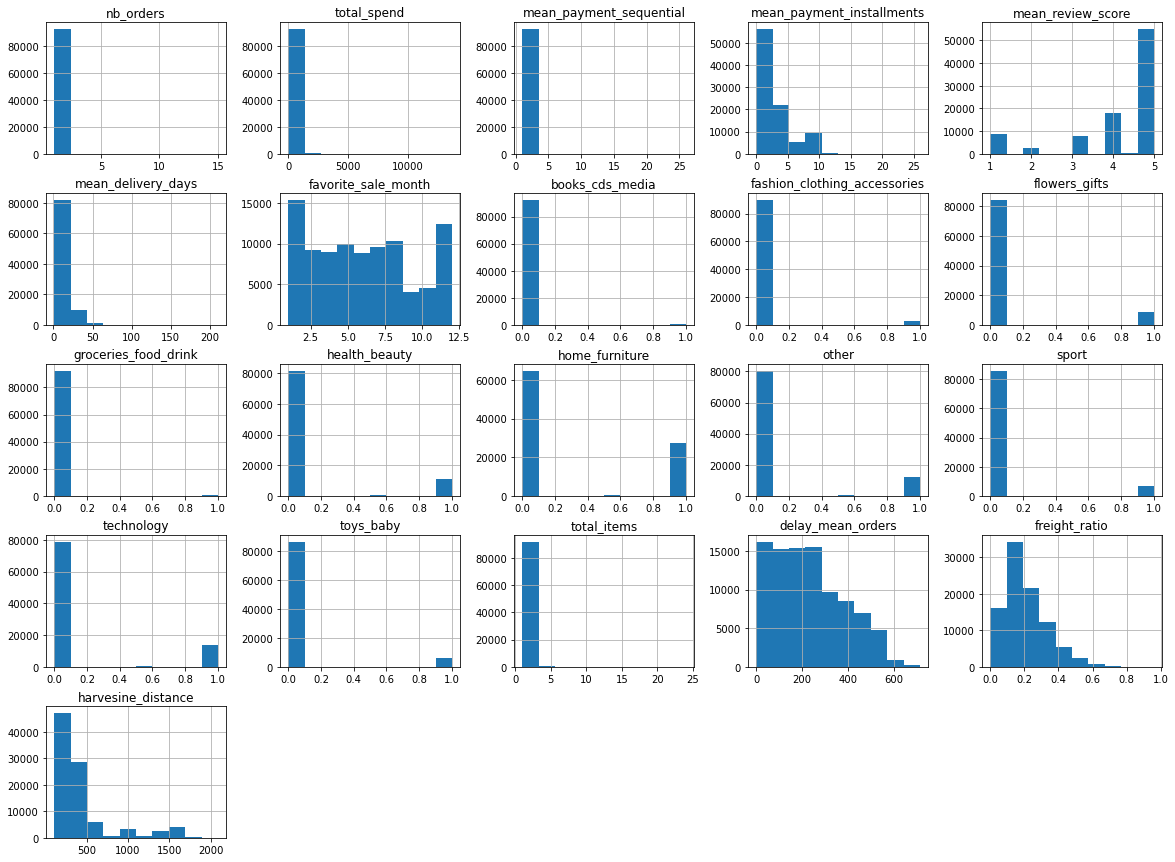

<Figure size 864x576 with 0 Axes>

In [10]:
# Visualisation
data_cleaned.hist(figsize=(20,15))
plt.show()
plt.tight_layout()

### Détermination du nombre de cluster K

#### Méthode du coude

In [11]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

In [12]:
from sklearn.compose import ColumnTransformer, make_column_transformer

scaler = MinMaxScaler()

preprocessor = ColumnTransformer([
    ('scaler',  MinMaxScaler(), num_features)])

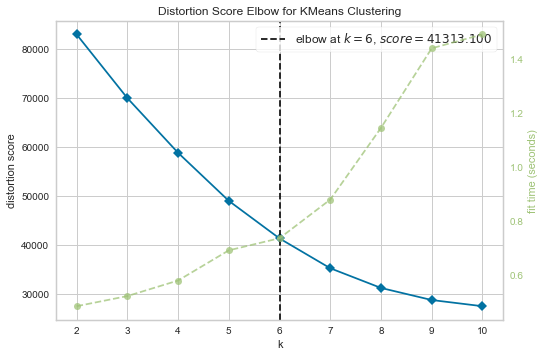

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [13]:
from sklearn.pipeline import Pipeline, make_pipeline

Xs = data_cleaned.copy()

# Elbow method
kmeans_visualizer = Pipeline([
    ("preprocessor", preprocessor),
    ("kelbowvisualizer", KElbowVisualizer(KMeans(),K=(4,12)))])
kmeans_visualizer.fit(Xs)
kmeans_visualizer.named_steps['kelbowvisualizer'].show()

Grâce à la métric "distorsion"  qui calcule la somme des distances au carré de chaque point à son centre attribué nous donne une ségmentation du nombre de clusters K = 6.

In [14]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer, InterclusterDistance

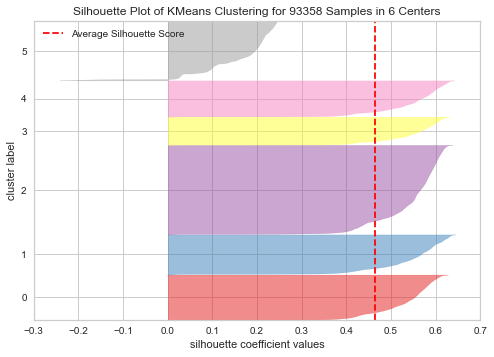

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 93358 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [15]:
# choix du meilleur K avec le coefficient silhouette
import time
start_time = time.time()
K = kmeans_visualizer.named_steps['kelbowvisualizer'].elbow_value_

# Silhouette Visualizer
silhouette_visualizer = Pipeline([
    ("preprocessor", preprocessor),
    ("silhouettevisualizer", SilhouetteVisualizer(KMeans(K)))])
silhouette_visualizer.fit(Xs)
silhouette_visualizer.named_steps['silhouettevisualizer'].show()

Le score est calculé en faisant la moyenne du coefficient de silhouette pour chaque échantillon, calculé comme la différence entre la distance intra-grappe moyenne et la distance moyenne de la grappe la plus proche pour chaque échantillon, normalisée par la valeur maximale. Cela produit un score entre -1 et +1, où des scores proches de +1 indiquent une séparation élevée et des scores proches de -1 indiquent que les échantillons peuvent avoir été affectés au mauvais cluster.

Dans notre cas on voit bien la séparation et la répartition des clusters qui sont claires 

Essayons d'autres métric pour pour trouver le meilleur K et faire la comparaison

Silhouette :  calculé comme la différence entre la distance intra-grappe moyenne et la distance moyenne de la grappe la plus proche pour chaque échantillon, normalisée par la valeur maximale

Calinski Harabasz :  calcule le rapport de dispersion entre et au sein des clusters.

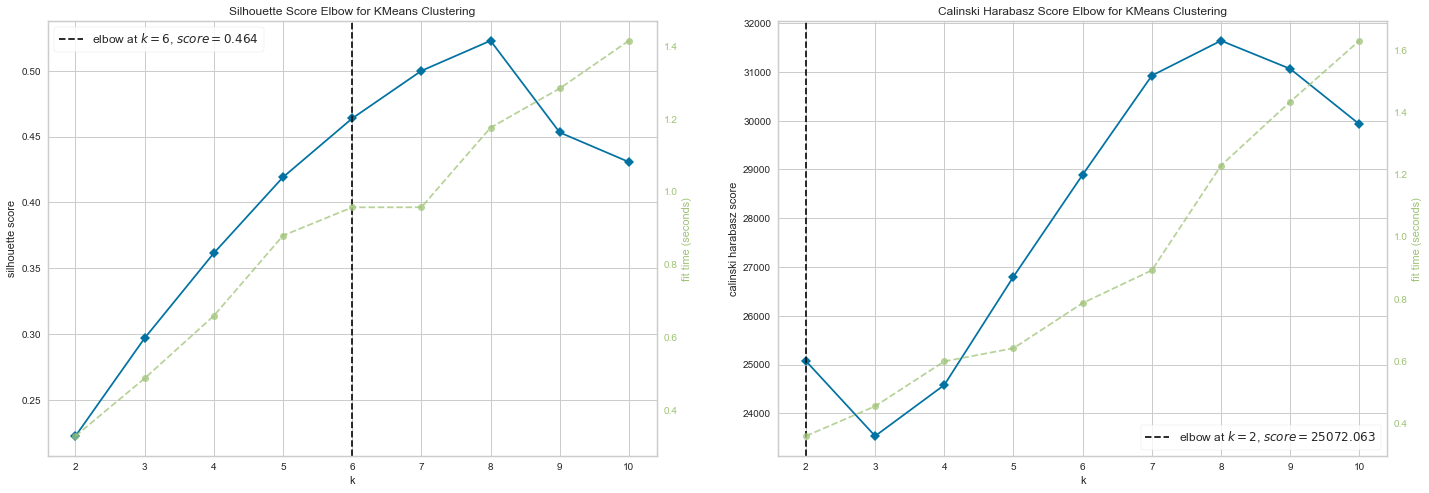

In [16]:
# Test avec différents metrics
metrics = ["silhouette", "calinski_harabasz"]
i = 0

fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(24,8))
for m in metrics:
    kmeans_visualizer = Pipeline([
        ("preprocessor", preprocessor),
        ("kelbowvisualizer", KElbowVisualizer(KMeans(), K=(4,12),metric=m, ax=axes[i]))])
    kmeans_visualizer.fit(Xs)
    kmeans_visualizer.named_steps['kelbowvisualizer'].finalize()
    i+=1

plt.show()

D'après les deux visualisations, On voit avec le coefficient silhouette qui garde toujours le nombre de K = 6 tandisque avec le calinski_harabasz qui nous donne un K = 2(incertain) avec ce grand nombre de données.

On conserve avec le K = 6 du coefficient de silhouette.

### Vérifions la distance intercluster

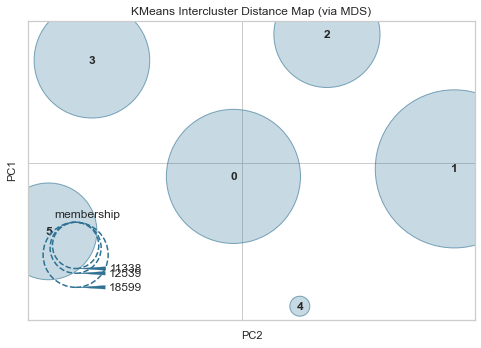

<AxesSubplot:title={'center':'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>

In [17]:
# Distance entre les grappes Carte avec le meilleur k
distance_visualizer = Pipeline([
    ("preprocessor", preprocessor),
    ("distancevisualizer", InterclusterDistance(KMeans(K)))])
distance_visualizer.fit(Xs)
distance_visualizer.named_steps['distancevisualizer'].show()

Sur cette projection en 2D, on voit que les différents clusters sont bien séparés sur les deux premières composantes principales.

Le clustering semble performant pour la répartion de chaque cluster.

### Analyse des différents clusters

Comme nous avons dèjà le nombre de clusters optimal K = 6, nous allons faire entrainer nos données avec le K optimal puis faire la prédiction(affecter son cluster à chaque client), pour analyser les différences entre chaque cluster.

In [18]:
# Pipeline KMeans avec le meilleur K
kmeans_model = Pipeline([("preprocessor", preprocessor),
                         ("kmeans", KMeans(K))])
kmeans_model.fit(Xs)

# Kmeans labels
kmeans_labels = kmeans_model.named_steps['kmeans'].labels_
# Ajouter la nouvelle colonne 
data_cleaned["kmeans_label"] = kmeans_labels

In [19]:
# Afficher les premières lignes
data_cleaned.head()

nb_orders  total_spend  \
customer_unique_id                                         
0000366f3b9a7992bf8c76cfdf3221e2          1       141.90   
0000b849f77a49e4a4ce2b2a4ca5be3f          1        27.19   
0000f46a3911fa3c0805444483337064          1        86.22   
0000f6ccb0745a6a4b88665a16c9f078          1        43.62   
0004aac84e0df4da2b147fca70cf8255          1       196.89   

                                  mean_payment_sequential  \
customer_unique_id                                          
0000366f3b9a7992bf8c76cfdf3221e2                      1.0   
0000b849f77a49e4a4ce2b2a4ca5be3f                      1.0   
0000f46a3911fa3c0805444483337064                      1.0   
0000f6ccb0745a6a4b88665a16c9f078                      1.0   
0004aac84e0df4da2b147fca70cf8255                      1.0   

                                  mean_payment_installments  \
customer_unique_id                                            
0000366f3b9a7992bf8c76cfdf3221e2                        8.0   
0000b849f77a49e4a4ce2b2a4ca5be3f                        1.0   
0000f46a3911fa3c0805444483337064                        8.0   
0000f6ccb0745a6a4b88665a16c9f078                        4.0   
0004aac84e0df4da2b147fca70cf8255                        6.0   

                                  mean_review_score  mean_delivery_days  \
customer_unique_id                                                        
0000366f3b9a7992bf8c76cfdf3221e2                5.0                 6.0   
0000b849f77a49e4a4ce2b2a4ca5be3f                4.0                 3.0   
0000f46a3911fa3c0805444483337064                3.0                26.0   
0000f6ccb0745a6a4b88665a16c9f078                4.0                20.0   
0004aac84e0df4da2b147fca70cf8255                5.0                13.0   

                                  favorite_sale_month  books_cds_media  \
customer_unique_id                                                       
0000366f3b9a7992bf8c76cfdf3221e2                    5              0.0   
0000b849f77a49e4a4ce2b2a4ca5be3f                    5              0.0   
0000f46a3911fa3c0805444483337064                    3              0.0   
0000f6ccb0745a6a4b88665a16c9f078                   10              0.0   
0004aac84e0df4da2b147fca70cf8255                   11              0.0   

                                  fashion_clothing_accessories  flowers_gifts  \
customer_unique_id                                                              
0000366f3b9a7992bf8c76cfdf3221e2                           0.0            0.0   
0000b849f77a49e4a4ce2b2a4ca5be3f                           0.0            0.0   
0000f46a3911fa3c0805444483337064                           0.0            0.0   
0000f6ccb0745a6a4b88665a16c9f078                           0.0            0.0   
0004aac84e0df4da2b147fca70cf8255                           0.0            0.0   

                                  groceries_food_drink  health_beauty  \
customer_unique_id                                                      
0000366f3b9a7992bf8c76cfdf3221e2                   0.0            0.0   
0000b849f77a49e4a4ce2b2a4ca5be3f                   0.0            1.0   
0000f46a3911fa3c0805444483337064                   0.0            0.0   
0000f6ccb0745a6a4b88665a16c9f078                   0.0            0.0   
0004aac84e0df4da2b147fca70cf8255                   0.0            0.0   

                                  home_furniture  other  sport  technology  \
customer_unique_id                                                           
0000366f3b9a7992bf8c76cfdf3221e2             1.0    0.0    0.0         0.0   
0000b849f77a49e4a4ce2b2a4ca5be3f             0.0    0.0    0.0         0.0   
0000f46a3911fa3c0805444483337064             0.0    1.0    0.0         0.0   
0000f6ccb0745a6a4b88665a16c9f078             0.0    0.0    0.0         1.0   
0004aac84e0df4da2b147fca70cf8255             0.0    0.0    0.0         1.0   

                                  toys_baby  total_items  delay_mean_or

Nous allons grouper les individus par cluster pour analyser les moyennes 

In [20]:
# grouper par cluster
kmeans_clusters_means = data_cleaned.groupby("kmeans_label").mean().reset_index()
kmeans_clusters_means

kmeans_label  nb_orders  total_spend  mean_payment_sequential  \
0             0   1.020822   145.901162                 1.036320   
1             1   1.041077   163.743980                 1.055654   
2             2   1.041454   147.060124                 1.040280   
3             3   1.029811   163.606396                 1.034346   
4             4   1.022412   221.570960                 1.041733   
5             5   1.029588   178.774496                 1.041530   

   mean_payment_installments  mean_review_score  mean_delivery_days  \
0                   2.258794           4.096053           13.085129   
1                   3.288553           4.083964           12.974358   
2                   2.674549           4.241767           11.911632   
3                   3.146668           4.247872           12.030561   
4                   3.636730           4.173193           12.657227   
5                   2.841296           4.182752           12.152916   

   favorite_sale_month  books_cds_media  fashion_clothing_accessories  \
0             5.699788         0.000035                      0.000675   
1             6.049836         0.000137                      0.000701   
2             6.255551         0.045074                      0.167981   
3             6.068354         0.000176                      0.000588   
4             6.271331         0.000114                      0.000796   
5             5.861711         0.000199                      0.001176   

   flowers_gifts  groceries_food_drink  health_beauty  home_furniture  \
0       0.000498              0.000224       0.000313        0.001396   
1       0.000821              0.000159       0.000653        0.993787   
2       0.001853              0.047729       0.001722        0.004061   
3       0.000573              0.000606       0.993211        0.002624   
4       0.992837              0.000023       0.000815        0.002522   
5       0.001287              0.000116       0.001563        0.005224   

      other     sport  technology  toys_baby  total_items  delay_mean_orders  \
0  0.000377  0.000018    0.996369   0.000094     1.152408         236.661774   
1  0.001464  0.000194    0.001538   0.000545     1.277528         236.919173   
2  0.001990  0.386154    0.001476   0.341961     1.149309         242.490782   
3  0.000763  0.000098    0.001235   0.000125     1.128065         222.062984   
4  0.000724  0.000061    0.001631   0.000477     1.086121         234.487438   
5  0.987580  0.000127    0.002076   0.000651     1.154558         211.195098   

   freight_ratio  harvesine_distance  
0       0.259958          472.015897  
1       0.216125          399.566834  
2       0.203651          430.699536  
3       0.188540          464.371923  
4       0.140005          484.907177  
5       0.204127          434.086435

In [21]:
X_scaled = preprocessor.fit_transform(Xs)
X_scaled = pd.DataFrame(X_scaled, index=Xs.index, columns=Xs.columns)
X_scaled["kmeans_label"] = kmeans_labels
X_scaled_clusters = X_scaled.groupby("kmeans_label").mean()
X_scaled_clusters

nb_orders  total_spend  mean_payment_sequential  \
kmeans_label                                                    
0              0.001487     0.009983                 0.001453   
1              0.002934     0.011290                 0.002226   
2              0.002961     0.010068                 0.001611   
3              0.002129     0.011280                 0.001374   
4              0.001601     0.015525                 0.001669   
5              0.002113     0.012390                 0.001661   

              mean_payment_installments  mean_review_score  \
kmeans_label                                                 
0                              0.086877           0.774013   
1                              0.126483           0.770991   
2                              0.102867           0.810442   
3                              0.121026           0.811968   
4                              0.139874           0.793298   
5                              0.109281           0.795688   

              mean_delivery_days  favorite_sale_month  books_cds_media  \
kmeans_label                                                             
0                       0.057824             0.427253         0.000035   
1                       0.057294             0.459076         0.000137   
2                       0.052209             0.477777         0.045074   
3                       0.052778             0.460759         0.000176   
4                       0.055776             0.479212         0.000114   
5                       0.053363             0.441974         0.000199   

              fashion_clothing_accessories  flowers_gifts  \
kmeans_label                                                
0                                 0.000675       0.000498   
1                                 0.000701       0.000821   
2                                 0.167981       0.001853   
3                                 0.000588       0.000573   
4                                 0.000796       0.992837   
5                                 0.001176       0.001287   

              groceries_food_drink  health_beauty  home_furniture     other  \
kmeans_label                                                                  
0                         0.000224       0.000313        0.001396  0.000377   
1                         0.000159       0.000653        0.993787  0.001464   
2                         0.047729       0.001722        0.004061  0.001990   
3                         0.000606       0.993211        0.002624  0.000763   
4                         0.000023       0.000815        0.002522  0.000724   
5                         0.000116       0.001563        0.005224  0.987580   

                 sport  technology  toys_baby  total_items  delay_mean_orders  \
kmeans_label                                                                    
0             0.000018    0.996369   0.000094     0.006626           0.331924   
1             0.000194    0.001538   0.000545     0.012066           0.332285   
2             0.386154    0.001476   0.341961     0.006492           0.340099   
3             0.000098    0.001235   0.000125     0.005568           0.311449   
4             0.000061    0.001631   0.000477     0.003744           0.328874   
5             0.000127    0.002076   0.000651     0.006720           0.296206   

              freight_ratio  harvesine_distance  
kmeans_label                                     
0                  0.270789            0.183678  
1                  0.225131            0.147065  
2                  0.212136            0.162798  
3                  0.196396            0.179815  
4                  0.145838            0.190193  
5                  0.212632            0.164510

Faisons la visualisation de ces différentes moyennes sur un Radar plot pour visualiser les différents clusters

In [22]:
def plot_radars(data, group):

    scaler = MinMaxScaler()
    data = pd.DataFrame(scaler.fit_transform(data), 
                        index=data.index,
                        columns=data.columns).reset_index()
    
    fig = go.Figure()

    for k in data[group]:
        fig.add_trace(go.Scatterpolar(
            r=data[data[group]==k].iloc[:,1:].values.reshape(-1),
            theta=data.columns[1:],
            fill='toself',
            name='Cluster '+str(k)
        ))

    fig.update_layout(
        polar=dict(
        radialaxis=dict(
          visible=True,
          range=[0, 1]
        )),
        showlegend=True,
        title={
            'text': "Comparaison des moyennes par variable des clusters",
            'y':0.95,
            'x':0.5,
            'xanchor': 'center',
            'yanchor': 'top'},
        title_font_color="red",
        title_font_size=18)

    fig.show()

In [23]:
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
import plotly.graph_objs as go

## Visualisation

In [24]:
plot_radars(data=X_scaled_clusters,
            group="kmeans_label")

On voit que la segmentation se base principalement sur les catégories de produits achetées.
Pour ne pas écraser les autres axes de catégorisation, nous allons supprimer supprimer ces variables en réalisant un nouveau K_means.

## Boxplot

In [25]:
font_title = {"family": "serif",
              "color":  "#476bff",
              "weight": "bold",
              "size": 18}

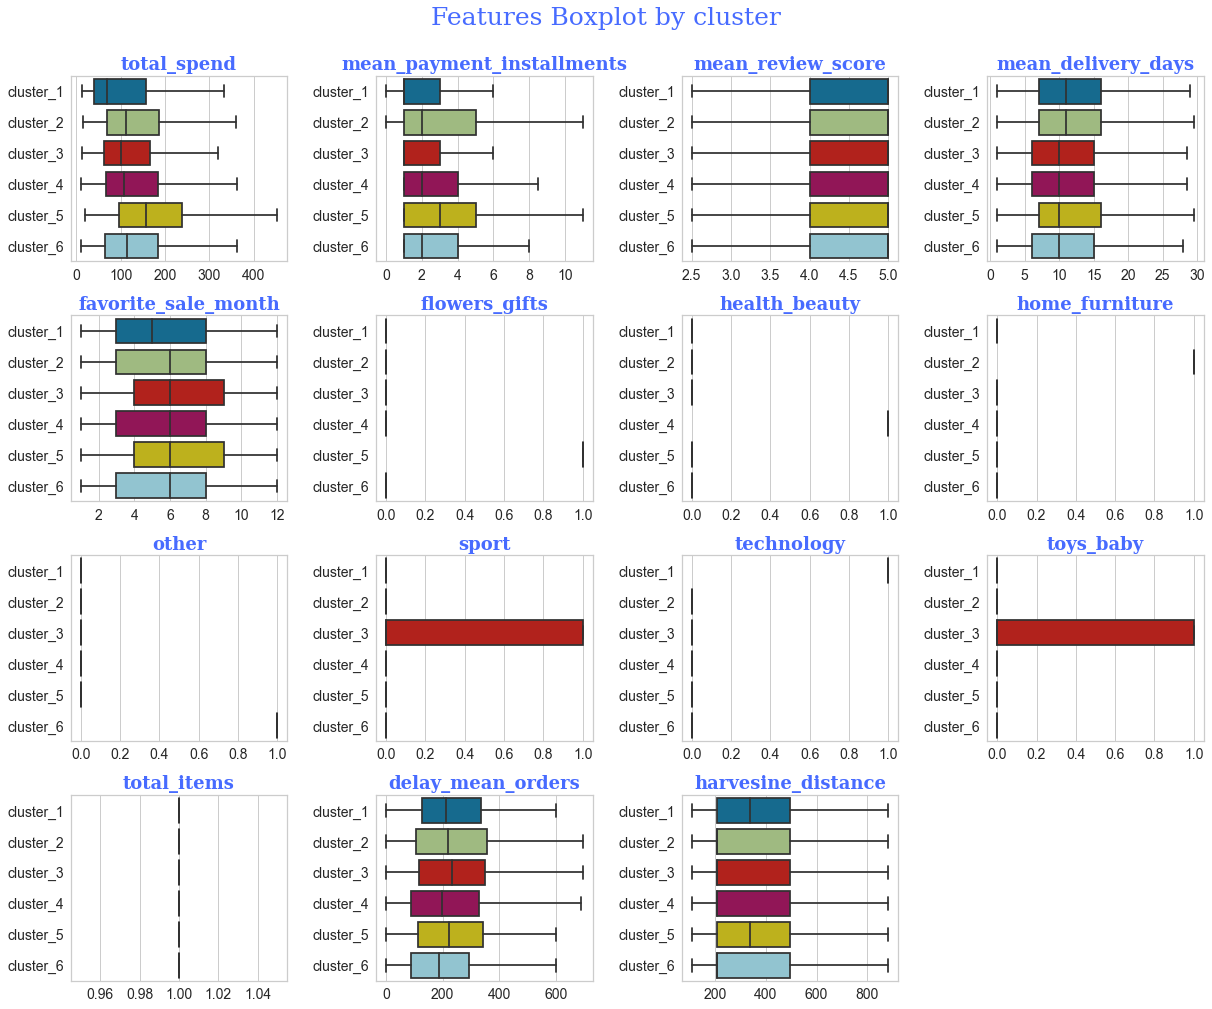

In [26]:
scaler = MinMaxScaler()
scaler.fit(Xs)

X_b = scaler.inverse_transform(X_scaled.iloc[:, :-1])
X_b = pd.DataFrame(X_b, index=Xs.index, columns=Xs.columns)
X_b["kmeans_label"] = kmeans_labels
X_b


for i in X_b['kmeans_label'].unique():
    X_b['kmeans_label'].replace(i, f"cluster_{i+1}", inplace=True)


fig, ax = plt.subplots(figsize=(17, 14))
fig.suptitle('Features Boxplot by cluster',
             fontdict=font_title, fontsize=25, y=1)
j = 0
for i, feat in enumerate(X_b.columns[:-1]):
    if X_b[feat].quantile(0.95) > 0.9+X_b[feat].quantile(0.20):
        plt.subplot(4, 4, i+1-j)
        ax = sns.boxplot(data=X_b, x=feat, y="kmeans_label",
                         order=["cluster_1", "cluster_2", "cluster_3",
                                "cluster_4", "cluster_5", "cluster_6"],
                         showfliers=False)
        plt.title(feat, fontdict=font_title)
        plt.xlabel("")
        plt.ylabel("")
        plt.xticks(size=14)
        plt.yticks(size=14)
    else:
        j += 1


fig.tight_layout()

## Visualisation des clusters

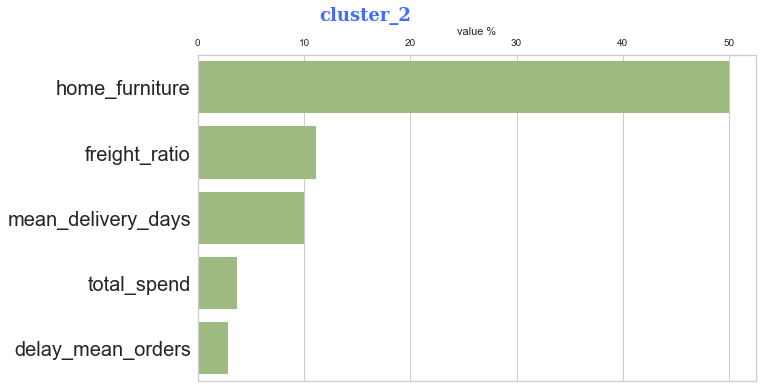

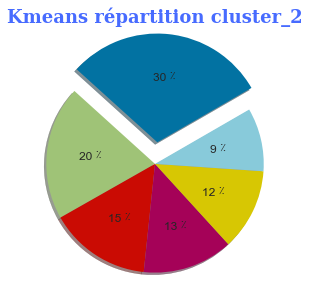

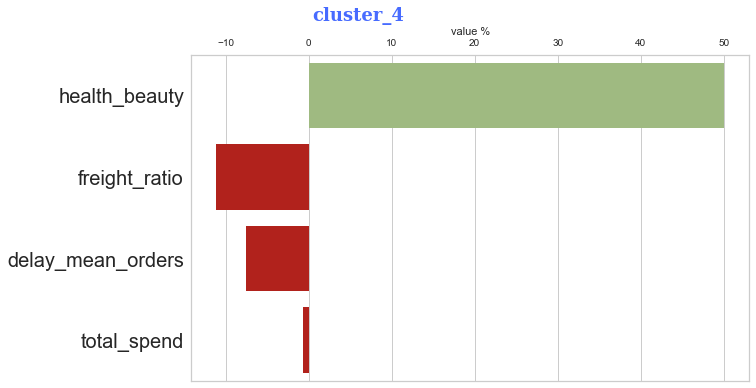

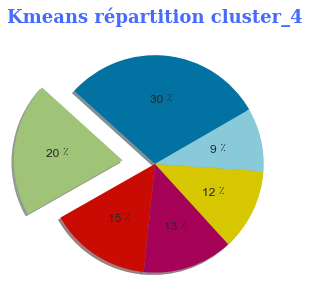

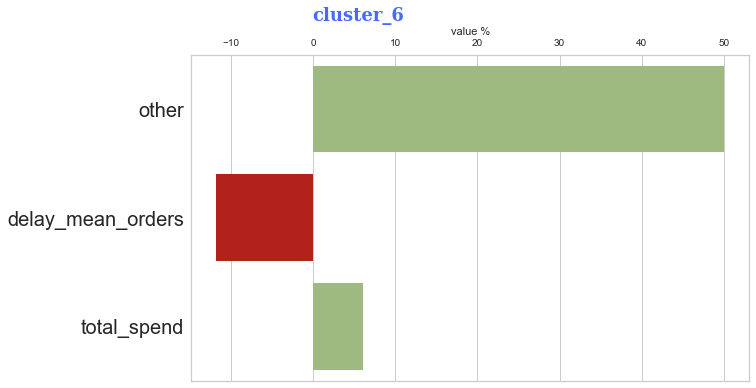

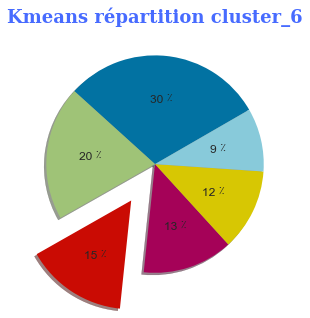

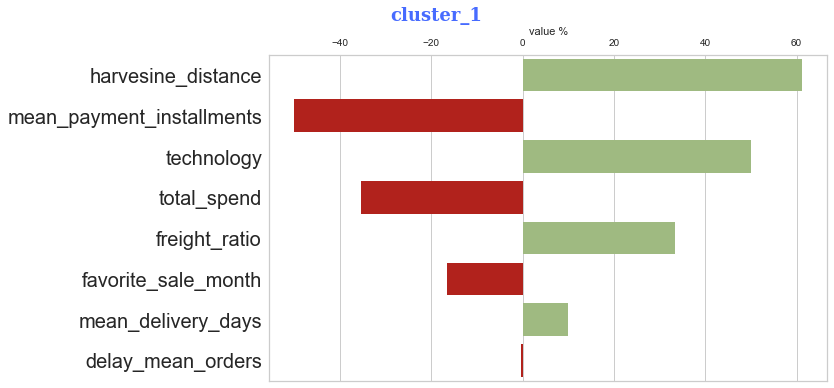

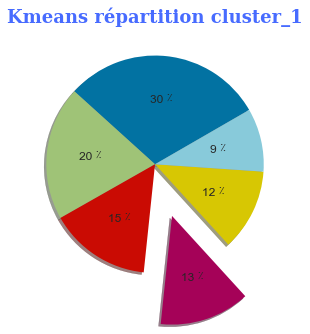

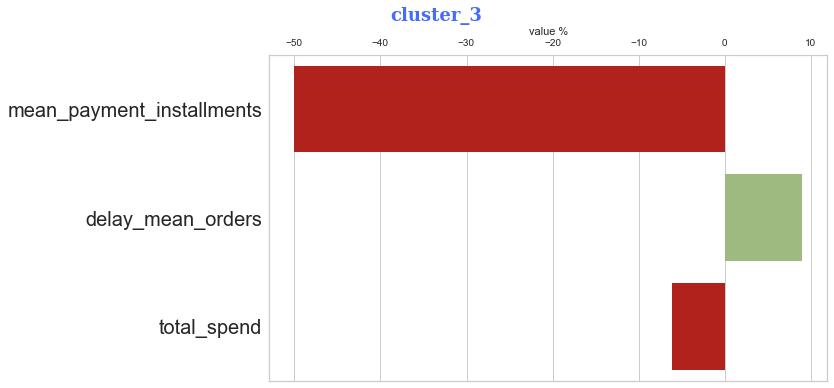

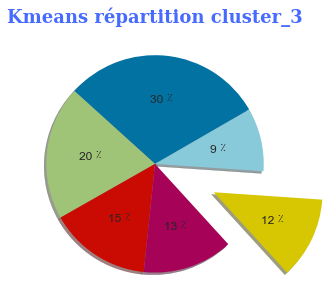

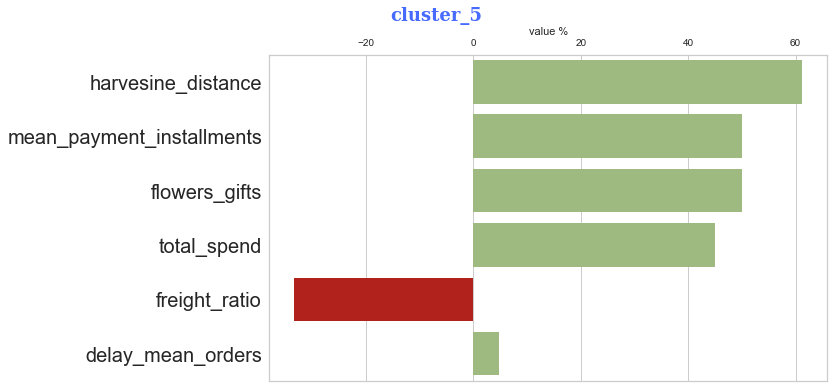

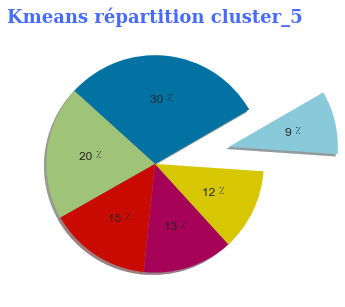

In [27]:
for i, cluster in enumerate(X_b['kmeans_label'].unique()):
    # data recovery
    to_plot = (
        (X_b[X_b['kmeans_label'] == cluster].median()/X_b.median()-1)*100)
    to_plot = pd.DataFrame(to_plot, columns=['value %']).replace(np.inf, 50)
    to_plot['Features'] = to_plot.index
    to_plot = to_plot.sort_values(ascending=False, by='value %', key=abs)

    # fig
    to_plot = to_plot[to_plot['value %'] != 0].dropna(axis=0)
    colors = ['g' if c >= 0 else 'r' for c in to_plot['value %']]
    fig, ax = plt.subplots(figsize=(10, 6))
    plt.title(cluster, x=0.3, fontdict=font_title)
    sns.barplot(data=to_plot, y='Features', x='value %', palette=colors)
    plt.yticks(fontsize=20)
    plt.ylabel(None)
    ax.xaxis.set_ticks_position('top')
    ax.xaxis.set_label_position('top')
    # plt.legend(labels=None)
    plt.show()

    explode = [0, 0, 0, 0, 0, 0]
    explode[i] = 0.2+i*0.1
    fig, ax = plt.subplots(figsize=(5, 5))
    plt.pie(X_b['kmeans_label'].value_counts(),
            shadow=True, startangle=30, explode=explode,
            autopct="%1.0f ٪")
    plt.title(f'Kmeans répartition {cluster}', fontdict=font_title)
    plt.show()

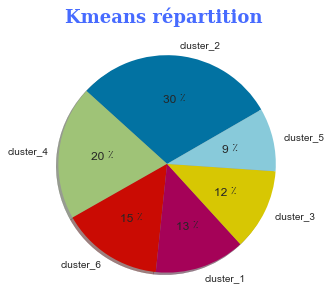

In [28]:
fig, ax = plt.subplots(figsize=(5, 5))
plt.pie(X_b['kmeans_label'].value_counts(),
        labels=X_b['kmeans_label'].unique(),
        shadow=True, startangle=30,
        autopct="%1.0f ٪")
plt.title(f'Kmeans répartition ', fontdict=font_title)
plt.show()

In [29]:
# Suppression des variables
categories_products = ['books_cds_media', 'fashion_clothing_accessories', 'flowers_gifts', 'toys_baby',
                  'groceries_food_drink', 'health_beauty', 'home_furniture', 'other','sport','technology']
X_bis = Xs.drop(categories_products, axis=1)
X_bis.head()

nb_orders  total_spend  \
customer_unique_id                                         
0000366f3b9a7992bf8c76cfdf3221e2          1       141.90   
0000b849f77a49e4a4ce2b2a4ca5be3f          1        27.19   
0000f46a3911fa3c0805444483337064          1        86.22   
0000f6ccb0745a6a4b88665a16c9f078          1        43.62   
0004aac84e0df4da2b147fca70cf8255          1       196.89   

                                  mean_payment_sequential  \
customer_unique_id                                          
0000366f3b9a7992bf8c76cfdf3221e2                      1.0   
0000b849f77a49e4a4ce2b2a4ca5be3f                      1.0   
0000f46a3911fa3c0805444483337064                      1.0   
0000f6ccb0745a6a4b88665a16c9f078                      1.0   
0004aac84e0df4da2b147fca70cf8255                      1.0   

                                  mean_payment_installments  \
customer_unique_id                                            
0000366f3b9a7992bf8c76cfdf3221e2                        8.0   
0000b849f77a49e4a4ce2b2a4ca5be3f                        1.0   
0000f46a3911fa3c0805444483337064                        8.0   
0000f6ccb0745a6a4b88665a16c9f078                        4.0   
0004aac84e0df4da2b147fca70cf8255                        6.0   

                                  mean_review_score  mean_delivery_days  \
customer_unique_id                                                        
0000366f3b9a7992bf8c76cfdf3221e2                5.0                 6.0   
0000b849f77a49e4a4ce2b2a4ca5be3f                4.0                 3.0   
0000f46a3911fa3c0805444483337064                3.0                26.0   
0000f6ccb0745a6a4b88665a16c9f078                4.0                20.0   
0004aac84e0df4da2b147fca70cf8255                5.0                13.0   

                                  favorite_sale_month  total_items  \
customer_unique_id                                                   
0000366f3b9a7992bf8c76cfdf3221e2                    5          1.0   
0000b849f77a49e4a4ce2b2a4ca5be3f                    5          1.0   
0000f46a3911fa3c0805444483337064                    3          1.0   
0000f6ccb0745a6a4b88665a16c9f078                   10          1.0   
0004aac84e0df4da2b147fca70cf8255                   11          1.0   

                                  delay_mean_orders  freight_ratio  \
customer_unique_id                                                   
0000366f3b9a7992bf8c76cfdf3221e2              111.0           0.08   
0000b849f77a49e4a4ce2b2a4ca5be3f              114.0           0.30   
0000f46a3911fa3c0805444483337064              537.0           0.20   
0000f6ccb0745a6a4b88665a16c9f078              321.0           0.40   
0004aac84e0df4da2b147fca70cf8255              288.0           0.09   

                                  harvesine_distance  
customer_unique_id                                    
0000366f3b9a7992bf8c76cfdf3221e2          209.713834  
0000b849f77a49e4a4ce2b2a4ca5be3f          209.713834  
0000f46a3911fa3c0805444483337064          125.363853  
0000f6ccb0745a6a4b88665a16c9f078         1574.231129  
0004aac84e0df4da2b147fca70cf8255          209.713834

Pour éviter la répétition, nous allons définir une fonction des différentes étapes réaliseés ci-dessus

In [30]:
# Définir la fonction 
def clustering_eval(preprocessor, model, data, metric, elbow=True, mds=False, KBest=None):
    
    if((elbow==True) & (mds==True)):
        ncols=3
    elif((elbow==False) | (mds==False)):
        ncols=2
    else:
        ncols=1
        
    fig, axes = plt.subplots(nrows=1, ncols=ncols, sharex=False, sharey=False, figsize=(24,8))
    
    ax=0
    if(elbow==True):
        # Elbow visualizer
        kmeans_visualizer = Pipeline([
            ("preprocessor", preprocessor),
            ("kelbowvisualizer", KElbowVisualizer(model,K=(4,12), metric=metric, ax=axes[ax]))])
        kmeans_visualizer.fit(data)
        KBest = kmeans_visualizer.named_steps['kelbowvisualizer'].elbow_value_
        kmeans_visualizer.named_steps['kelbowvisualizer'].finalize()
        ax+=1
    
    # Définir le meilleur K
    K = KBest
    model.set_params(n_clusters=K)

    # Silhouette Visualizer
    silhouette_visualizer = Pipeline([
        ("preprocessor", preprocessor),
        ("silhouettevisualizer", SilhouetteVisualizer(model, ax=axes[ax]))])
    silhouette_visualizer.fit(data)
    silhouette_visualizer.named_steps['silhouettevisualizer'].finalize()
    ax+=1
    
    # Distance entre les grappes Carte avec le meilleur k
    if(mds==True):
        distance_visualizer = Pipeline([
            ("preprocessor", preprocessor),
            ("distancevisualizer", InterclusterDistance(model, ax=axes[ax]))])
        distance_visualizer.fit(data)
        distance_visualizer.named_steps['distancevisualizer'].finalize()
    
    return K
    plt.show()

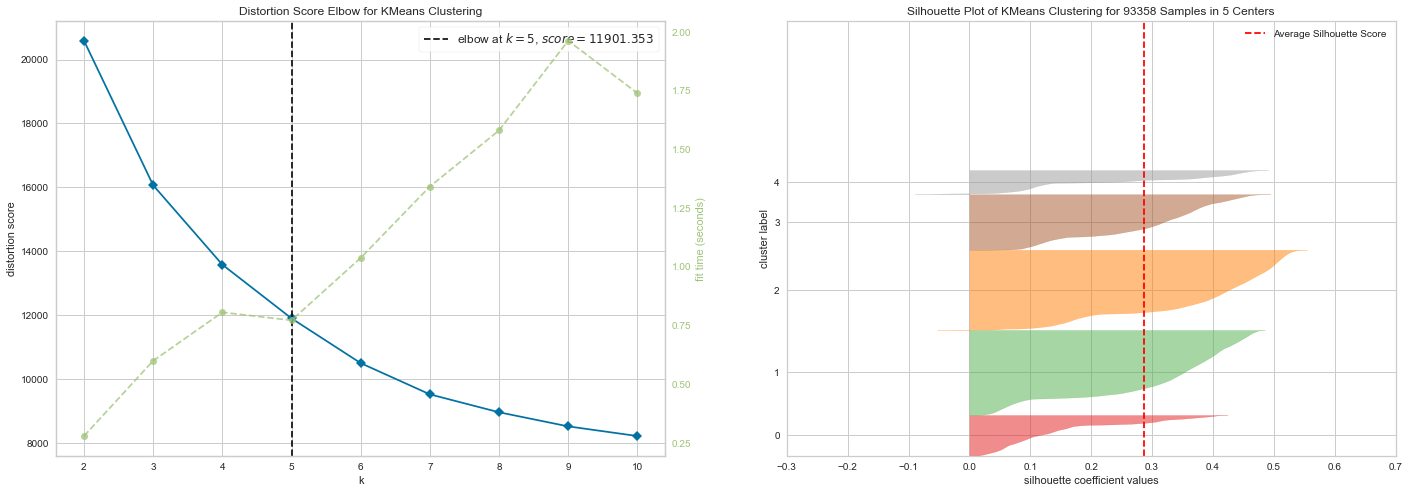

In [31]:
# Appelle à la fonction
K = clustering_eval(preprocessor=MinMaxScaler(), 
                model=KMeans(), 
                data=X_bis, 
                metric="distortion",
                elbow=True,
                mds=False,
                KBest=None)

On voit aprés suppression de certains variables , on a le nombre de K = 5

In [32]:
# Pipeline KMeans avec le meilleur K
kmeans_model_bis = Pipeline([("preprocessor", MinMaxScaler()),
                             ("kmeans", KMeans(K))])
kmeans_model_bis.fit(X_bis)

# Kmeans labels
kmeans_labels_bis = kmeans_model_bis.named_steps['kmeans'].labels_

# Scale X
scaler = MinMaxScaler()
X_scaled_bis = scaler.fit_transform(X_bis)
X_scaled_bis = pd.DataFrame(X_scaled_bis, index=X_bis.index, columns=X_bis.columns)
X_scaled_bis["kmeans_label"] = kmeans_labels_bis

# Regrouper par cluster
X_scaled_clusters_bis = X_scaled_bis.groupby("kmeans_label").mean()

# Tracer une carte radar
plot_radars(data=X_scaled_clusters_bis,
            group="kmeans_label")

pd.DataFrame(scaler.inverse_transform(
    X_scaled_clusters_bis), columns=X_bis.columns)

nb_orders  total_spend  mean_payment_sequential  mean_payment_installments  \
0   1.026300   193.169324                 1.046936                   3.225524   
1   1.070475   169.656685                 1.036805                   2.863224   
2   1.036819   156.758507                 1.040149                   2.724966   
3   1.016554   158.674444                 1.042991                   3.030503   
4   1.000136   157.591514                 1.059436                   3.189085   

   mean_review_score  mean_delivery_days  favorite_sale_month  total_items  \
0           1.255365           20.201248             5.808251     1.350055   
1           4.626722            9.007359             6.519497     1.201840   
2           4.550746           12.743724             2.498765     1.154102   
3           4.576068           12.325323            10.214125     1.136278   
4           4.573070           11.807616             4.755525     1.112955   

   delay_mean_orders  freight_ratio  harvesine_distance  
0         231.438374       0.213264          487.746311  
1          59.517499       0.210907          413.714785  
2         176.425938       0.205892          419.558881  
3         310.868485       0.203080          444.869133  
4         477.061340       0.210383          449.307993

## Boxplot

In [33]:
X_bis_b = scaler.inverse_transform(X_scaled_bis.iloc[:, :-1])
X_bis_b = pd.DataFrame(X_bis_b, index=X_bis.index, columns=X_bis.columns)
X_bis_b["kmeans_label"] = kmeans_labels_bis
X_bis_b

nb_orders  total_spend  \
customer_unique_id                                         
0000366f3b9a7992bf8c76cfdf3221e2        1.0       141.90   
0000b849f77a49e4a4ce2b2a4ca5be3f        1.0        27.19   
0000f46a3911fa3c0805444483337064        1.0        86.22   
0000f6ccb0745a6a4b88665a16c9f078        1.0        43.62   
0004aac84e0df4da2b147fca70cf8255        1.0       196.89   
...                                     ...          ...   
fffcf5a5ff07b0908bd4e2dbc735a684        1.0      2067.42   
fffea47cd6d3cc0a88bd621562a9d061        1.0        84.58   
ffff371b4d645b6ecea244b27531430a        1.0       112.46   
ffff5962728ec6157033ef9805bacc48        1.0       133.69   
ffffd2657e2aad2907e67c3e9daecbeb        1.0        71.56   

                                  mean_payment_sequential  \
customer_unique_id                                          
0000366f3b9a7992bf8c76cfdf3221e2                      1.0   
0000b849f77a49e4a4ce2b2a4ca5be3f                      1.0   
0000f46a3911fa3c0805444483337064                      1.0   
0000f6ccb0745a6a4b88665a16c9f078                      1.0   
0004aac84e0df4da2b147fca70cf8255                      1.0   
...                                                   ...   
fffcf5a5ff07b0908bd4e2dbc735a684                      1.0   
fffea47cd6d3cc0a88bd621562a9d061                      1.0   
ffff371b4d645b6ecea244b27531430a                      1.0   
ffff5962728ec6157033ef9805bacc48                      1.0   
ffffd2657e2aad2907e67c3e9daecbeb                      1.0   

                                  mean_payment_installments  \
customer_unique_id                                            
0000366f3b9a7992bf8c76cfdf3221e2                        8.0   
0000b849f77a49e4a4ce2b2a4ca5be3f                        1.0   
0000f46a3911fa3c0805444483337064                        8.0   
0000f6ccb0745a6a4b88665a16c9f078                        4.0   
0004aac84e0df4da2b147fca70cf8255                        6.0   
...                                                     ...   
fffcf5a5ff07b0908bd4e2dbc735a684                       10.0   
fffea47cd6d3cc0a88bd621562a9d061                        1.0   
ffff371b4d645b6ecea244b27531430a                        1.0   
ffff5962728ec6157033ef9805bacc48                        5.0   
ffffd2657e2aad2907e67c3e9daecbeb                        4.0   

                                  mean_review_score  mean_delivery_days  \
customer_unique_id                                                        
0000366f3b9a7992bf8c76cfdf3221e2                5.0                 6.0   
0000b849f77a49e4a4ce2b2a4ca5be3f                4.0                 3.0   
0000f46a3911fa3c0805444483337064                3.0                26.0   
0000f6ccb0745a6a4b88665a16c9f078                4.0                20.0   
0004aac84e0df4da2b147fca70cf8255                5.0                13.0   
...                                             ...                 ...   
fffcf5a5ff07b0908bd4e2dbc735a684                5.0                28.0   
fffea47cd6d3cc0a88bd621562a9d061                4.0                30.0   
ffff371b4d645b6ecea244b27531430a                5.0                15.0   
ffff5962728ec6157033ef9805bacc48                5.0                12.0   
ffffd2657e2aad2907e67c3e9daecbeb                5.0                 8.0   

                                  favorite_sale_month  total_items  \
customer_unique_id                                                   
0000366f3b9a7992bf8c76cfdf3221e2                  5.0          1.0   
0000b849f77a49e4a4ce2b2a4ca5be3f                  5.0          1.0   
0000f46a3911fa3c0805444483337064                  3.0          1.0   
0000f6ccb0745a6a4b88665a16c9f078                 10.0          1.0   
0004aac84e0df4da2b147fca70cf8255                 11.0          1.0   
...                                               ...          ...   
fffcf5a5ff07b0908bd4e2dbc735a684                  6.0          2.0   
fffea47cd6d3cc0a88bd621562a9d061 

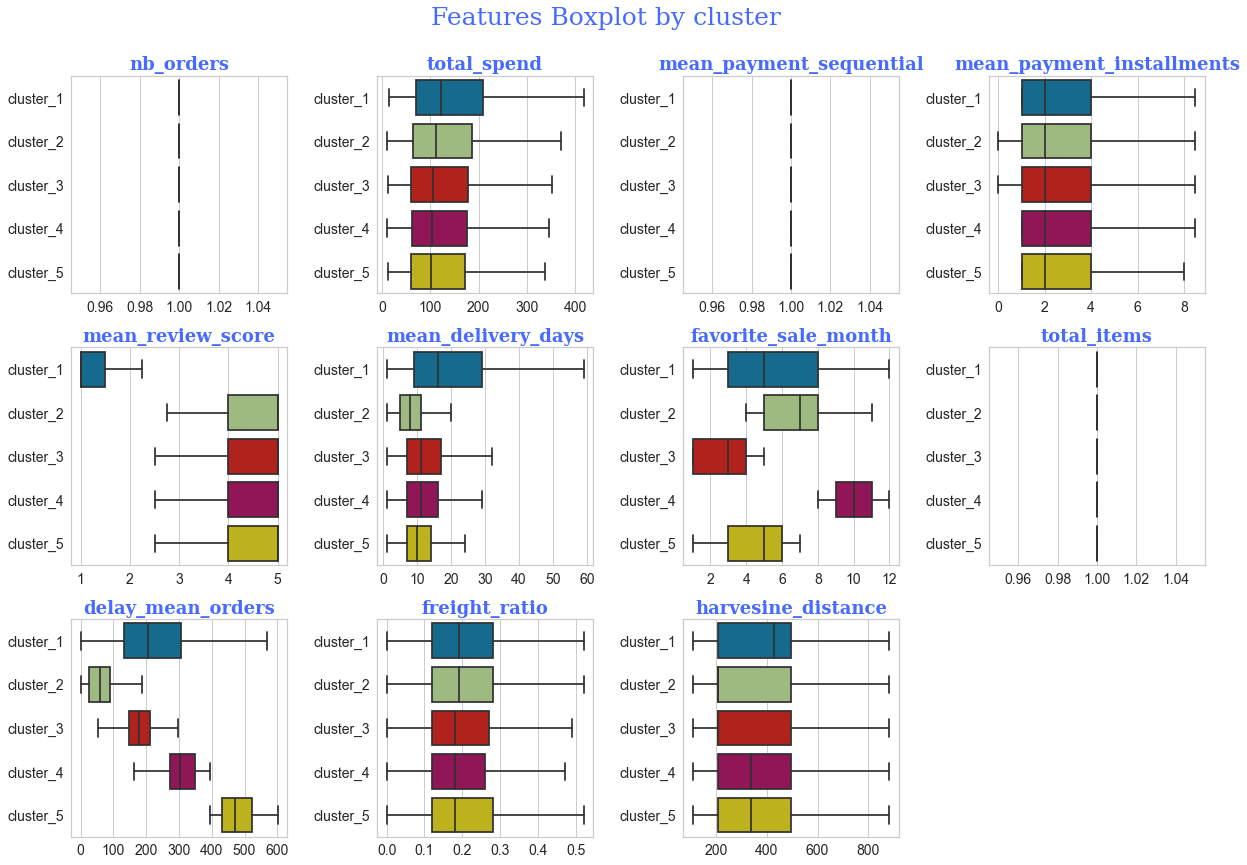

In [34]:
for i in X_bis_b['kmeans_label'].unique():
    X_bis_b['kmeans_label'].replace(i, f"cluster_{i+1}", inplace=True)


fig, ax = plt.subplots(figsize=(17, 12))
fig.suptitle('Features Boxplot by cluster',
             fontdict=font_title, fontsize=25, y=1)

for i, feat in enumerate(X_bis_b.columns[:-1]):
    plt.subplot(3, 4, i+1)
    ax = sns.boxplot(data=X_bis_b, x=feat, y="kmeans_label",
                     order=["cluster_1", "cluster_2", "cluster_3",
                            "cluster_4", "cluster_5"],  # "cluster_6"],
                     showfliers=False)
    plt.title(feat, fontdict=font_title)
    plt.xlabel("")
    plt.ylabel("")
    plt.xticks(size=14)
    plt.yticks(size=14)


fig.tight_layout()

## Barplot par centre de cluster

In [35]:
explode = [0, 0, 0, 0, 0]
explode[1] = 0.3
explode

[0, 0.3, 0, 0, 0]

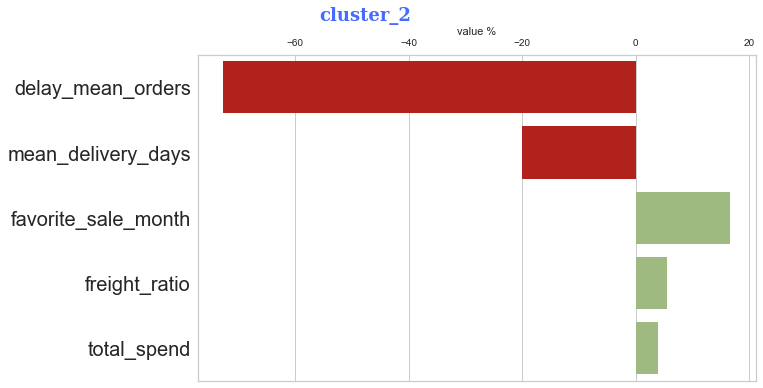

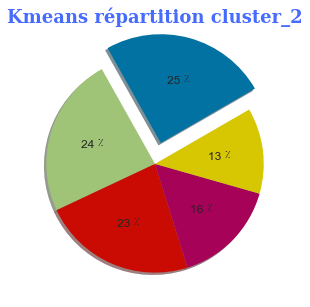

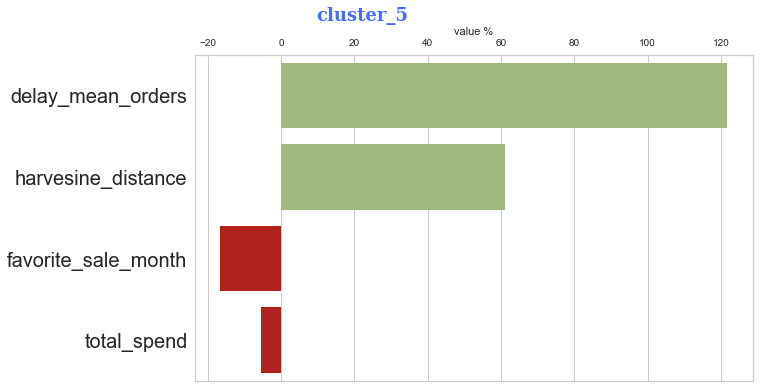

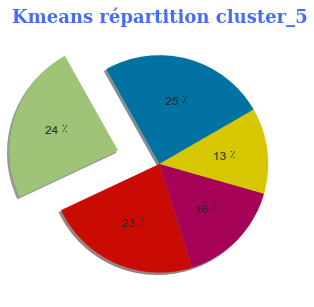

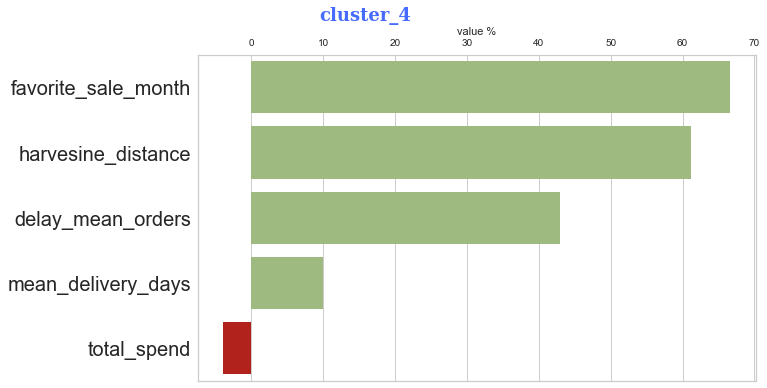

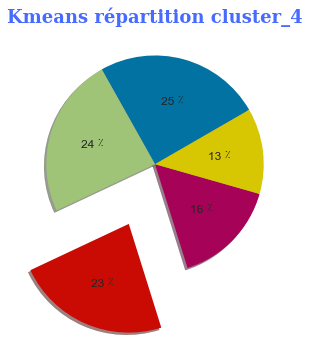

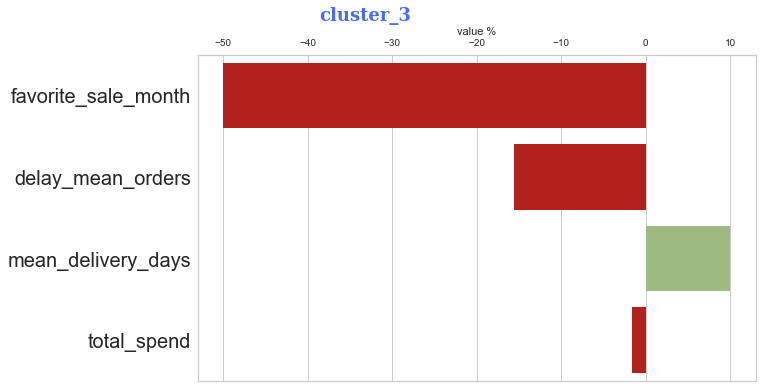

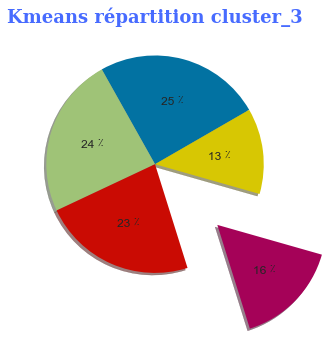

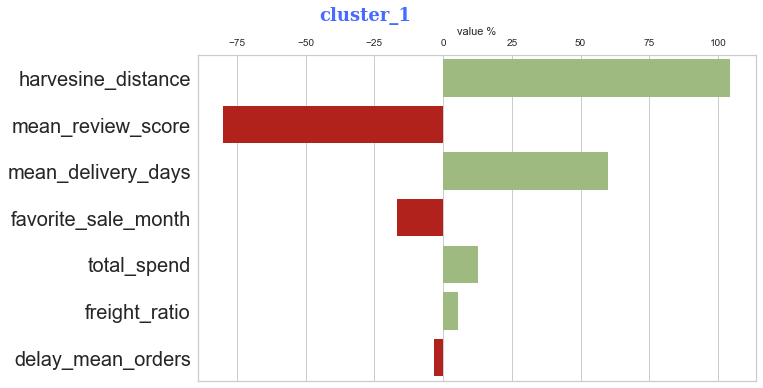

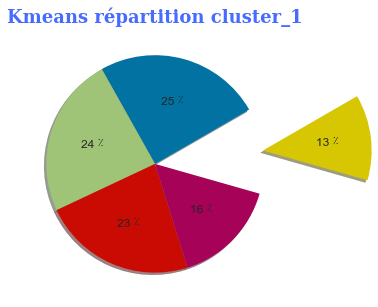

In [36]:
for i, cluster in enumerate(X_bis_b['kmeans_label'].unique()):
    # data recovery
    to_plot = ((X_bis_b[X_bis_b['kmeans_label'] ==
               cluster].median()/X_bis_b.median()-1)*100)
    to_plot = pd.DataFrame(to_plot, columns=['value %'])
    to_plot['Features'] = to_plot.index
    to_plot = to_plot.sort_values(ascending=False, by='value %', key=abs)

    # fig
    to_plot = to_plot[to_plot['value %'] != 0].dropna(
        axis=0).replace(np.inf, 50)
    colors = ['g' if c >= 0 else 'r' for c in to_plot['value %']]
    fig, ax = plt.subplots(figsize=(10, 6))
    plt.title(cluster, x=0.3, fontdict=font_title)
    sns.barplot(data=to_plot, y='Features', x='value %', palette=colors)
    plt.yticks(fontsize=20)
    plt.ylabel(None)
    ax.xaxis.set_ticks_position('top')
    ax.xaxis.set_label_position('top')
    # plt.legend(labels=None)
    plt.show()

    explode = [0, 0, 0, 0, 0]
    explode[i] = 0.2+i*0.2
    fig, ax = plt.subplots(figsize=(5, 5))
    plt.pie(X_bis_b['kmeans_label'].value_counts(),
            shadow=True, startangle=30, explode=explode,
            autopct="%1.0f ٪")
    plt.title(f'Kmeans répartition {cluster}', fontdict=font_title)
    plt.show()

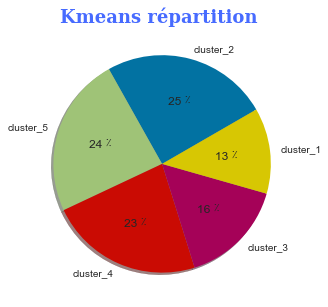

In [37]:
fig, ax = plt.subplots(figsize=(5, 5))
plt.pie(X_bis_b['kmeans_label'].value_counts(),
        labels=X_bis_b['kmeans_label'].unique(),
        shadow=True, startangle=30,
        autopct="%1.0f ٪")
plt.title(f'Kmeans répartition ', fontdict=font_title)
plt.show()

### Interprétation des clusters

Groupe 1 : Clients proches géographiquement avec de courts délais de livraison, commandant principalement en début d'année pour des montants faibles. Ils paient avec 1 type de moyen de paiement et avec un nombre faible d'échéances. Les avis de ces clients sont très bons.

Groupe 2 : Clients de fin d'année. Ils règlent avec plusieurs moyens de paiement pour des montants faibles. Ces clients sont géographiquement peu éloignés et les délais de livraison sont courts. Les avis de ces clients sont également très bons.

Groupe 3 : Ce sont des clients mécontants (les avis sont mauvais). Les délais de livraison sont très importants et les frais de port élevés en raison de l'éloignement géographique. Ce sont cependant les clients qui ont le plus dépensé et ont acheté un grand nombre d'articles. En revanche, le nombre de commandes passées sur le site est moyen.

Groupe 4 : Regroupe les clients qui utilisent plusieurs moyens de paiement et un nombre important d'échéances. Ils ont tendence à espacer les délais entre 2 commandes. Les avis de ces clients sont également très bons.

Groupe 5 : Ces clients ont passé un nombre important de commandes et sont satisfaits. ils paient comptant pour un montant moyen de commande. Ils sont géographiquement proches.

## Réduction dimensionnelle - PCA

Nous allons réaliser une Analyse en Composantes Principales appelée PCA qui consiste à réduire la dimension de nos données tout en gardant le maximum d'informations ( entre 95 à 99 % des données).

Cette réduction de dimension nous permettra de vérifier si le clustering est réalisable sur un nombre réduit de variables sans perdre d'information sur les clusters

In [38]:
# définir le PCA Pipeline
from sklearn.decomposition import PCA

pca = Pipeline([("preprocessor", MinMaxScaler()),
                ("pca", PCA(svd_solver='full'))]) #sélectionnez le nombre de composants de sorte que le montant de la 
                                                  #variance à expliquer soit supérieur au pourcentage spécifié par 
                                                  #n_composants.0 < n_components < 1svd_solver == 'full'
pca.fit(X_bis)
X_projected = pca.transform(X_bis)

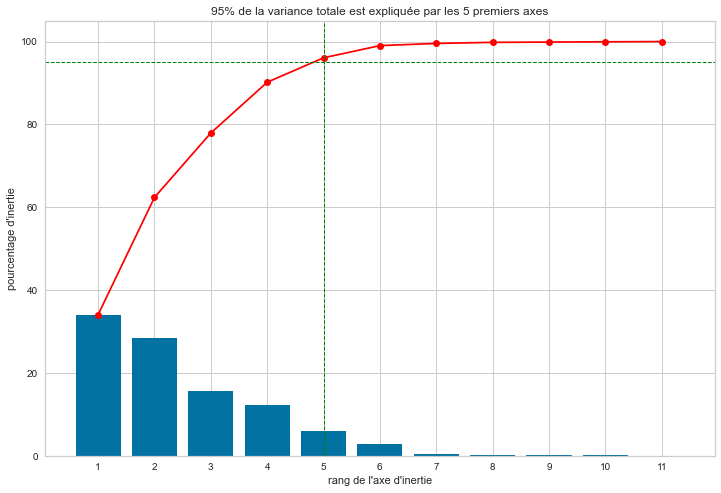

In [40]:
# Variance expliquée
varexpl = pca.named_steps['pca'].explained_variance_ratio_*100

# Graphique de la variance cumulée
plt.figure(figsize=(12,8))
plt.bar(np.arange(len(varexpl))+1, varexpl)

# Somme des variances
cumSumVar = varexpl.cumsum()
plt.plot(np.arange(len(varexpl))+1, cumSumVar,c = "red",marker = 'o')
plt.axhline(y = 95, linestyle="--", 
            color="green",
            linewidth=1)

limit = 95
valid_idx = np.where(cumSumVar >= limit)[0]
min_plans = valid_idx[cumSumVar[valid_idx].argmin()]+1
plt.axvline(x=min_plans, linestyle="--", 
            color="green",
            linewidth=1)

plt.xlabel("rang de l'axe d'inertie")
plt.xticks(np.arange(len(varexpl))+1)
plt.ylabel("pourcentage d'inertie")
plt.title("{}% de la variance totale est expliquée"\
          " par les {} premiers axes".format(limit,
                                            min_plans))
plt.show(block=False)

Il nous faut conserver 5 composantes principales pour expliquer 95% de la variance des données.

## Cercle des corrélations

In [41]:
def display_circles(pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None):
    for d1, d2 in axis_ranks: # On affiche les 3 premiers plans factoriels, donc les 6 premières composantes
        if d2 < n_comp:

            # initialisation de la figure
            fig, ax = plt.subplots(figsize=(8,8))

            # détermination des limites du graphique
            if lims is not None :
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 30 :
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else :
                xmin, xmax, ymin, ymax = min(pcs[d1,:]), max(pcs[d1,:]), min(pcs[d2,:]), max(pcs[d2,:])

            # affichage des flèches
            # s'il y a plus de 30 flèches, on n'affiche pas le triangle à leur extrémité
            if pcs.shape[1] < 30 :
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                   pcs[d1,:], pcs[d2,:], 
                   angles='xy', scale_units='xy', scale=1, color="grey")
                # (voir la doc : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.quiver.html)
            else:
                lines = [[[0,0],[x,y]] for x,y in pcs[[d1,d2]].T]
                ax.add_collection(LineCollection(lines, axes=ax, alpha=.1, color='black'))
            
            # affichage des noms des variables  
            if labels is not None:  
                for i,(x, y) in enumerate(pcs[[d1,d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax :
                        plt.text(x, y, labels[i], fontsize='14', ha='center', va='center', rotation=label_rotation, color="blue", alpha=0.5)
            
            # affichage du cercle
            an = np.linspace(0, 2 * np.pi, 100)  # Ajoutez un cercle d'unité pour l'échelle
            plt.plot(np.cos(an), np.sin(an))
            plt.axis('equal')

            # définition des limites du graphique
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)
        
            # affichage des lignes horizontales et verticales
            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Cercle des corrélations (F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)

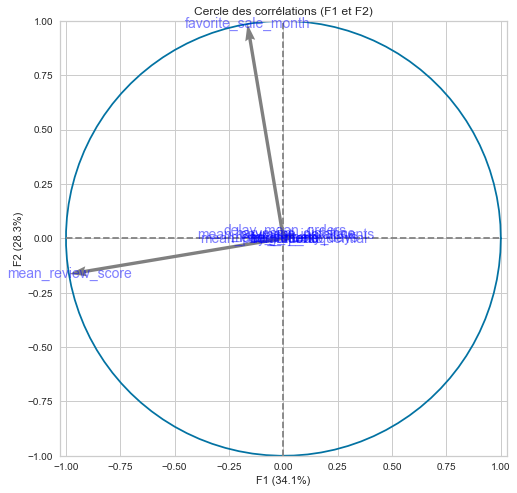

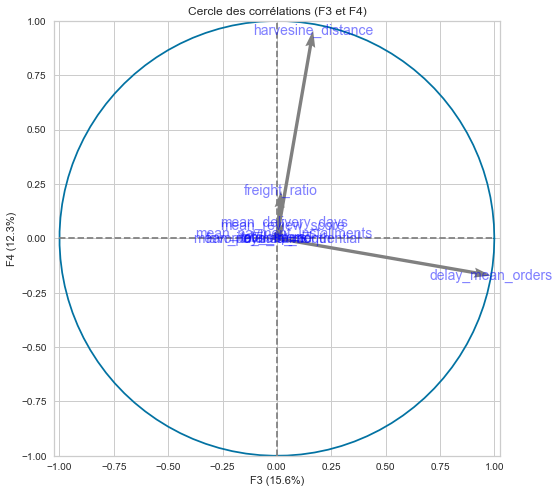

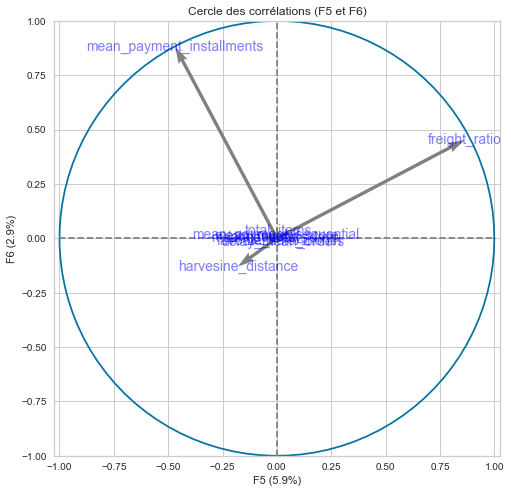

In [42]:
# Principal component space
pcs = pca.named_steps['pca'].components_

# Plot correlation circle
display_circles(pcs,6, 
           pca.named_steps['pca'],
           [(0,1),(2,3),(4,5)],
           labels = np.array(X_bis.columns))

On peut voir les variables qui contribuent le plus à chaque axe. Par exemple, la variable F2 représentera les périodes d'achats et la variable F4 quant à elle représente l'aspect géographique.

## K-Means après réduction de dimenssions

Aprés la réduction de dimensionnalité, on va intégrer à  notre pipeline Kmeans une PCA sur 5 composantes pour vérifier si la réduction dimensionnelle réduit la qualité de la segmentation.

In [43]:
# Pipeline KMeans avec les meilleurs résultats K pour PCA
kmeans_model_pca = Pipeline([("preprocessor", MinMaxScaler()),
                             ("kmeans", KMeans(K))])
kmeans_model_pca.fit(X_projected[:,:4])

# Kmeans labels
pca_kmeans_labels = kmeans_model_pca.named_steps['kmeans'].labels_
X_scaled_bis["kmeans_label_pca"] = pca_kmeans_labels
X_scaled_clusters_pca = X_scaled_bis.groupby("kmeans_label_pca").mean()
X_scaled_clusters_pca.iloc[:,:-1]

nb_orders  total_spend  mean_payment_sequential  \
kmeans_label_pca                                                    
0                  0.000010     0.010852                 0.002375   
1                  0.005084     0.011731                 0.001469   
2                  0.001860     0.013441                 0.001877   
3                  0.002596     0.010771                 0.001610   
4                  0.001173     0.010909                 0.001720   

                  mean_payment_installments  mean_review_score  \
kmeans_label_pca                                                 
0                                  0.122657           0.893350   
1                                  0.110094           0.906535   
2                                  0.124043           0.063986   
3                                  0.104824           0.887835   
4                                  0.116572           0.893990   

                  mean_delivery_days  favorite_sale_month  total_items  \
kmeans_label_pca                                                         
0                           0.051813             0.341930     0.004923   
1                           0.038308             0.501774     0.008824   
2                           0.091887             0.437095     0.015212   
3                           0.056185             0.136172     0.006670   
4                           0.054126             0.837622     0.005898   

                  delay_mean_orders  freight_ratio  harvesine_distance  
kmeans_label_pca                                                        
0                          0.669418       0.219165            0.172833  
1                          0.083383       0.219635            0.154000  
2                          0.324607       0.222203            0.191851  
3                          0.247553       0.214515            0.157198  
4                          0.435678       0.211510            0.169597

In [44]:
# Visualisation du radar plot
plot_radars(data=X_scaled_clusters_pca.iloc[:,:-1],
            group="kmeans_label_pca")

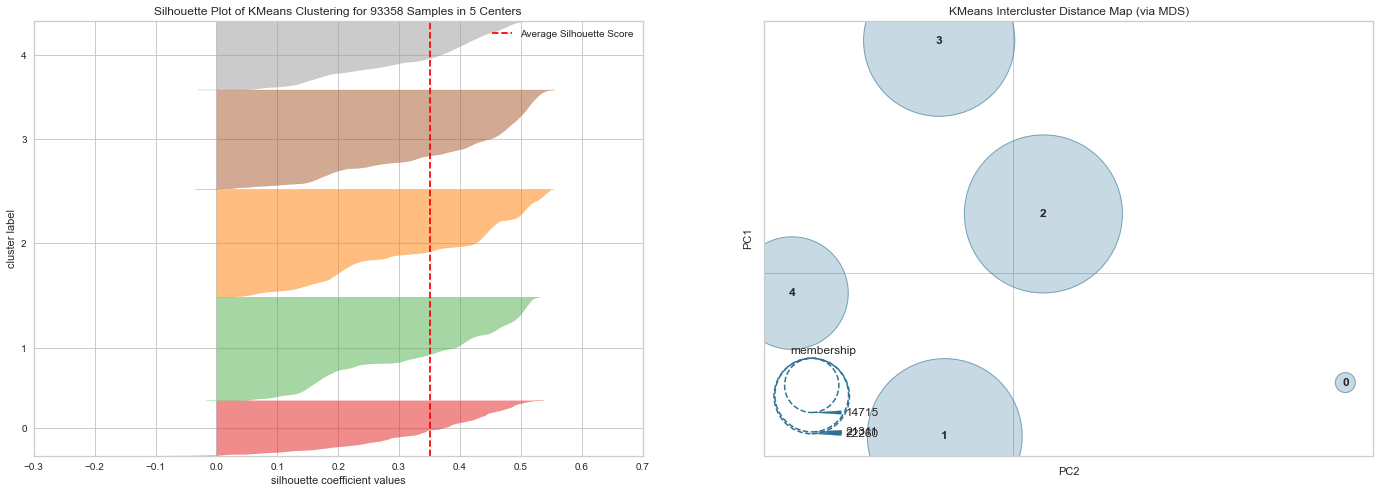

In [45]:
# Appelle à la fonction
K = clustering_eval(preprocessor = MinMaxScaler(), 
                model = KMeans(), 
                data = X_projected[:,:4], 
                metric = "distortion",
                elbow = False,
                mds = True,
                KBest = K)

On remarque donc ici que la réduction de dimenssion offre les mêmes axes de segmentation. Il est donc possible de réduire le nombre de features en entrée et d'utiliser les variables synthétiques de la PCA pour segmenter notre fichier client, ce d'autant que les scores silhouette sont ici meilleurs comparés au données brutes.

# Stabilité à l'initialisation du K-Means

Notre algorithme a des hyperparamètres par défaut et avec le paramètre init = K-means++ qui est une méthode d'initialisation qui consiste à placer les centroides sur des points du dataset éloignés les unes des autres ce qui facilite la convergence.

Cependant, nous allons tester la stabilité à l'initialisation en entrainant plusieurs fois le modèle sans fixer le RandomState.

In [46]:
from time import time
from sklearn.metrics import homogeneity_score, adjusted_rand_score, adjusted_mutual_info_score

Pour les labels initiaux, nous allons conserver les clusters calculés dans le dernier modèle (avec PCA) puis les comparer grâce à l'indice de Rand ajusté (ARI) pour chacune des itérations.

In [47]:
labels = pca_kmeans_labels
pca_data = X_projected[:,:4]

In [48]:
def bench_k_means(model, name, data, labels):
    t0 = time()
    estimator = make_pipeline(MinMaxScaler(), model).fit(data)
    fit_time = time() - t0
    results = [name, fit_time, estimator[1].inertia_]
    
    # Testez différentes métriques sur les pré-étiquettes
    clustering_metrics = [
        homogeneity_score,
        adjusted_rand_score,
        adjusted_mutual_info_score]
    results += [m(labels, estimator[1].labels_) for m in clustering_metrics]
    
    # Afficher les résultats
    formatter_result = ("{:9s}\t{:.3f}s\t{:.0f}\t{:.3f}"
                        "\t{:.3f}\t{:.3f}")
    print(formatter_result.format(*results))

In [49]:
print("Scores de stabilité à l'initialisation")
print(53 * '_')
print('Iteration\tFitTime\tInertia\tHomo\tARI\tAMI')
print(53 * '_')

for i in range(10):
    imodel = KMeans(n_clusters=K, n_init=1, init="k-means++")
    bench_k_means(model = imodel, name="Iter "+str(i), 
                  data=pca_data, labels=labels)

print(53 * '_')

Scores de stabilité à l'initialisation
_____________________________________________________
Iteration	FitTime	Inertia	Homo	ARI	AMI
_____________________________________________________
Iter 0   	0.090s	6157	1.000	1.000	1.000
Iter 1   	0.139s	6663	0.616	0.566	0.632
Iter 2   	0.078s	6157	1.000	1.000	1.000
Iter 3   	0.101s	6157	1.000	1.000	1.000
Iter 4   	0.067s	6646	0.683	0.607	0.716
Iter 5   	0.092s	6157	1.000	1.000	1.000
Iter 6   	0.094s	6157	1.000	1.000	1.000
Iter 7   	0.112s	6641	0.631	0.583	0.647
Iter 8   	0.075s	6157	1.000	1.000	1.000
Iter 9   	0.072s	6775	0.771	0.666	0.788
_____________________________________________________


Les différentes itérations montrent des inerties proches, une bonne homogénéité et un score AMI proche de 1. Nous pouvons donc en déduire que la stabilité à l'initialisation du modèle K-Means est bonne.

# Clustering avec l'algorithme du K-Prototypes

K-Prototypes est un frère moins connu mais offre l'avantage de travailler avec des types de données mixtes. Il mesure la distance entre les entités numériques à l'aide de la distance euclidienne (comme les K-moyennes), mais mesure également la distance entre les entités catégorielles à l'aide du nombre de catégories correspondantes. 

Nous allons convertir quelques variables en variables catégorielles pour leur donner plus de sens

In [50]:
Xs.head()

nb_orders  total_spend  \
customer_unique_id                                         
0000366f3b9a7992bf8c76cfdf3221e2          1       141.90   
0000b849f77a49e4a4ce2b2a4ca5be3f          1        27.19   
0000f46a3911fa3c0805444483337064          1        86.22   
0000f6ccb0745a6a4b88665a16c9f078          1        43.62   
0004aac84e0df4da2b147fca70cf8255          1       196.89   

                                  mean_payment_sequential  \
customer_unique_id                                          
0000366f3b9a7992bf8c76cfdf3221e2                      1.0   
0000b849f77a49e4a4ce2b2a4ca5be3f                      1.0   
0000f46a3911fa3c0805444483337064                      1.0   
0000f6ccb0745a6a4b88665a16c9f078                      1.0   
0004aac84e0df4da2b147fca70cf8255                      1.0   

                                  mean_payment_installments  \
customer_unique_id                                            
0000366f3b9a7992bf8c76cfdf3221e2                        8.0   
0000b849f77a49e4a4ce2b2a4ca5be3f                        1.0   
0000f46a3911fa3c0805444483337064                        8.0   
0000f6ccb0745a6a4b88665a16c9f078                        4.0   
0004aac84e0df4da2b147fca70cf8255                        6.0   

                                  mean_review_score  mean_delivery_days  \
customer_unique_id                                                        
0000366f3b9a7992bf8c76cfdf3221e2                5.0                 6.0   
0000b849f77a49e4a4ce2b2a4ca5be3f                4.0                 3.0   
0000f46a3911fa3c0805444483337064                3.0                26.0   
0000f6ccb0745a6a4b88665a16c9f078                4.0                20.0   
0004aac84e0df4da2b147fca70cf8255                5.0                13.0   

                                  favorite_sale_month  books_cds_media  \
customer_unique_id                                                       
0000366f3b9a7992bf8c76cfdf3221e2                    5              0.0   
0000b849f77a49e4a4ce2b2a4ca5be3f                    5              0.0   
0000f46a3911fa3c0805444483337064                    3              0.0   
0000f6ccb0745a6a4b88665a16c9f078                   10              0.0   
0004aac84e0df4da2b147fca70cf8255                   11              0.0   

                                  fashion_clothing_accessories  flowers_gifts  \
customer_unique_id                                                              
0000366f3b9a7992bf8c76cfdf3221e2                           0.0            0.0   
0000b849f77a49e4a4ce2b2a4ca5be3f                           0.0            0.0   
0000f46a3911fa3c0805444483337064                           0.0            0.0   
0000f6ccb0745a6a4b88665a16c9f078                           0.0            0.0   
0004aac84e0df4da2b147fca70cf8255                           0.0            0.0   

                                  groceries_food_drink  health_beauty  \
customer_unique_id                                                      
0000366f3b9a7992bf8c76cfdf3221e2                   0.0            0.0   
0000b849f77a49e4a4ce2b2a4ca5be3f                   0.0            1.0   
0000f46a3911fa3c0805444483337064                   0.0            0.0   
0000f6ccb0745a6a4b88665a16c9f078                   0.0            0.0   
0004aac84e0df4da2b147fca70cf8255                   0.0            0.0   

                                  home_furniture  other  sport  technology  \
customer_unique_id                                                           
0000366f3b9a7992bf8c76cfdf3221e2             1.0    0.0    0.0         0.0   
0000b849f77a49e4a4ce2b2a4ca5be3f             0.0    0.0    0.0         0.0   
0000f46a3911fa3c0805444483337064             0.0    1.0    0.0         0.0   
0000f6ccb0745a6a4b88665a16c9f078             0.0    0.0    0.0         1.0   
0004aac84e0df4da2b147fca70cf8255             0.0    0.0    0.0         1.0   

                                  toys_baby  total_items  delay_mean_or

In [51]:
X_pro = Xs.iloc[:,:-1]
X_pro["favorite_sale_month"] = pd.to_datetime(X_pro["favorite_sale_month"], format='%m').dt.month_name()
X_pro["mean_payment_sequential"] = np.where(X_pro["mean_payment_sequential"] > 1, "Multiple", "Single")
X_pro["mean_payment_installments"] = np.where(X_pro["mean_payment_installments"] > 1, "Multiple", "Single")
X_pro.head()

nb_orders  total_spend  \
customer_unique_id                                         
0000366f3b9a7992bf8c76cfdf3221e2          1       141.90   
0000b849f77a49e4a4ce2b2a4ca5be3f          1        27.19   
0000f46a3911fa3c0805444483337064          1        86.22   
0000f6ccb0745a6a4b88665a16c9f078          1        43.62   
0004aac84e0df4da2b147fca70cf8255          1       196.89   

                                 mean_payment_sequential  \
customer_unique_id                                         
0000366f3b9a7992bf8c76cfdf3221e2                  Single   
0000b849f77a49e4a4ce2b2a4ca5be3f                  Single   
0000f46a3911fa3c0805444483337064                  Single   
0000f6ccb0745a6a4b88665a16c9f078                  Single   
0004aac84e0df4da2b147fca70cf8255                  Single   

                                 mean_payment_installments  mean_review_score  \
customer_unique_id                                                              
0000366f3b9a7992bf8c76cfdf3221e2                  Multiple                5.0   
0000b849f77a49e4a4ce2b2a4ca5be3f                    Single                4.0   
0000f46a3911fa3c0805444483337064                  Multiple                3.0   
0000f6ccb0745a6a4b88665a16c9f078                  Multiple                4.0   
0004aac84e0df4da2b147fca70cf8255                  Multiple                5.0   

                                  mean_delivery_days favorite_sale_month  \
customer_unique_id                                                         
0000366f3b9a7992bf8c76cfdf3221e2                 6.0                 May   
0000b849f77a49e4a4ce2b2a4ca5be3f                 3.0                 May   
0000f46a3911fa3c0805444483337064                26.0               March   
0000f6ccb0745a6a4b88665a16c9f078                20.0             October   
0004aac84e0df4da2b147fca70cf8255                13.0            November   

                                  books_cds_media  \
customer_unique_id                                  
0000366f3b9a7992bf8c76cfdf3221e2              0.0   
0000b849f77a49e4a4ce2b2a4ca5be3f              0.0   
0000f46a3911fa3c0805444483337064              0.0   
0000f6ccb0745a6a4b88665a16c9f078              0.0   
0004aac84e0df4da2b147fca70cf8255              0.0   

                                  fashion_clothing_accessories  flowers_gifts  \
customer_unique_id                                                              
0000366f3b9a7992bf8c76cfdf3221e2                           0.0            0.0   
0000b849f77a49e4a4ce2b2a4ca5be3f                           0.0            0.0   
0000f46a3911fa3c0805444483337064                           0.0            0.0   
0000f6ccb0745a6a4b88665a16c9f078                           0.0            0.0   
0004aac84e0df4da2b147fca70cf8255                           0.0            0.0   

                                  groceries_food_drink  health_beauty  \
customer_unique_id                                                      
0000366f3b9a7992bf8c76cfdf3221e2                   0.0            0.0   
0000b849f77a49e4a4ce2b2a4ca5be3f                   0.0            1.0   
0000f46a3911fa3c0805444483337064                   0.0            0.0   
0000f6ccb0745a6a4b88665a16c9f078                   0.0            0.0   
0004aac84e0df4da2b147fca70cf8255                   0.0            0.0   

                                  home_furniture  other  sport  technology  \
customer_unique_id                                                           
0000366f3b9a7992bf8c76cfdf3221e2             1.0    0.0    0.0         0.0   
0000b849f77a49e4a4ce2b2a4ca5be3f             0.0    0.0    0.0         0.0   
0000f46a3911fa3c0805444483337064             0.0    1.0    0.0         0.0   
0000f6ccb0745a6a4b88665a16c9f078             0.0    0.0    0.0         1.0   
0004aac84e0df4da2b147fca70cf8255             0.0    0.0    0.0         1.0   

                                  toys_baby  total_items  delay_mean_orders  \
customer_uniq

Pour les K-Prototypes, j'appliquerai la transformation aux données numériques. Les données catégorielles ne nécessitent aucun pré-traitement.

In [52]:
from kmodes.kprototypes import KPrototypes

In [53]:
# Pre-processing
for c in X_pro.select_dtypes(exclude="object").columns:
    scaler = MinMaxScaler()
    X_pro[c] = scaler.fit_transform(np.array(X_pro[c]).reshape(-1, 1))

In [54]:
# categorical_columns
categorical_columns = [X_pro.columns.get_loc(c) for c in X_pro.select_dtypes(include="object").columns]
categorical_columns

[2, 3, 6]

In [55]:
#Tracé de coude pour choisir le k optimal
cost = []
for i in list(range(4,9)):
    kproto = KPrototypes(n_clusters = i , init = 'Cao', verbose=1)
    kproto.fit_predict(X_pro, categorical = categorical_columns)
    cost.append(kproto.cost_)    

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 21091, ncost: 76484.0959863894
Run: 1, iteration: 2/100, moves: 2590, ncost: 76446.59406595014
Run: 1, iteration: 3/100, moves: 13, ncost: 76446.58910972033
Run: 1, iteration: 4/100, moves: 2, ncost: 76446.58881095488
Run: 1, iteration: 5/100, moves: 0, ncost: 76446.58881095488
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 22296, ncost: 78539.72120403696
Run: 2, iteration: 2/100, moves: 3871, ncost: 78295.56192771287
Run: 2, iteration: 3/100, moves: 1637, ncost: 78209.67769634549
Run: 2, iteration: 4/100, moves: 77, ncost: 78209.46325271114
Run: 2, iteration: 5/100, moves: 0, ncost: 78209.46325271114
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/100, moves: 15537, ncost: 78780.35833664803
Run: 3, iteration: 2/100, moves: 11835, ncost: 71057.21098837713
Ru

Run: 7, iteration: 5/100, moves: 352, ncost: 68537.91311134824
Run: 7, iteration: 6/100, moves: 40, ncost: 68537.88296962476
Run: 7, iteration: 7/100, moves: 11, ncost: 68537.87269096669
Run: 7, iteration: 8/100, moves: 22, ncost: 68537.80378365927
Run: 7, iteration: 9/100, moves: 15, ncost: 68537.77778046741
Run: 7, iteration: 10/100, moves: 3, ncost: 68537.776832507
Run: 7, iteration: 11/100, moves: 0, ncost: 68537.776832507
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 8, iteration: 1/100, moves: 28597, ncost: 67573.98774426481
Run: 8, iteration: 2/100, moves: 2497, ncost: 67420.84375369245
Run: 8, iteration: 3/100, moves: 63, ncost: 67420.78743757632
Run: 8, iteration: 4/100, moves: 3, ncost: 67420.78620636025
Run: 8, iteration: 5/100, moves: 0, ncost: 67420.78620636025
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 9, iteration: 1/100, moves: 21197, ncost: 60519.157439740025
Run: 9, iteration: 2/100, move

Init: initializing clusters
Starting iterations...
Run: 4, iteration: 1/100, moves: 25240, ncost: 64182.70803293927
Run: 4, iteration: 2/100, moves: 5347, ncost: 63423.20404874026
Run: 4, iteration: 3/100, moves: 2307, ncost: 63224.564083593374
Run: 4, iteration: 4/100, moves: 1464, ncost: 63106.16034003561
Run: 4, iteration: 5/100, moves: 2300, ncost: 62644.54593697121
Run: 4, iteration: 6/100, moves: 12977, ncost: 54452.08659024469
Run: 4, iteration: 7/100, moves: 9356, ncost: 50551.5374843058
Run: 4, iteration: 8/100, moves: 140, ncost: 50550.43454756963
Run: 4, iteration: 9/100, moves: 2, ncost: 50550.434137721415
Run: 4, iteration: 10/100, moves: 0, ncost: 50550.434137721415
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 5, iteration: 1/100, moves: 15162, ncost: 42060.30258797447
Run: 5, iteration: 2/100, moves: 853, ncost: 41977.73270103015
Run: 5, iteration: 3/100, moves: 41, ncost: 41977.69054688919
Run: 5, iteration: 4/100, moves: 3, ncost

Run: 8, iteration: 4/100, moves: 154, ncost: 37943.62476472893
Run: 8, iteration: 5/100, moves: 16, ncost: 37943.61475756919
Run: 8, iteration: 6/100, moves: 2, ncost: 37943.61451618106
Run: 8, iteration: 7/100, moves: 0, ncost: 37943.61451618106
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 9, iteration: 1/100, moves: 33340, ncost: 58274.0952944572
Run: 9, iteration: 2/100, moves: 16349, ncost: 49568.97956735794
Run: 9, iteration: 3/100, moves: 5379, ncost: 47576.909262058216
Run: 9, iteration: 4/100, moves: 567, ncost: 47565.5794033934
Run: 9, iteration: 5/100, moves: 188, ncost: 47565.13001638956
Run: 9, iteration: 6/100, moves: 43, ncost: 47565.0938051968
Run: 9, iteration: 7/100, moves: 24, ncost: 47565.0853763388
Run: 9, iteration: 8/100, moves: 7, ncost: 47565.084109038435
Run: 9, iteration: 9/100, moves: 3, ncost: 47565.08394936725
Run: 9, iteration: 10/100, moves: 0, ncost: 47565.08394936725
Init: initializing centroids
Init: initializing

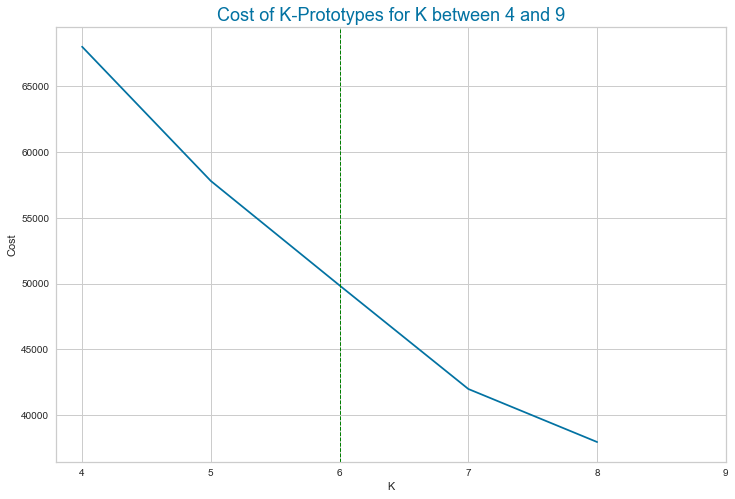

In [56]:
plt.figure(figsize = (12,8))
plt.plot(cost)
plt.xticks(np.arange(0,6,1), np.arange(4,10,1))
plt.axvline(x=2, linestyle = "--", 
            color="green",
            linewidth=1)
plt.xlabel("K")
plt.ylabel("Cost")
plt.title("Cost of K-Prototypes for K between 4 and 9",
          fontsize=18, color="b")
plt.show()

In [57]:
# Initialisation avec le nombre optimal K
kproto = KPrototypes(n_clusters= 6, init='Cao', n_init = 1, verbose = 1)
kproto_labels = kproto.fit_predict(X_pro, categorical = categorical_columns)

Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 34622, ncost: 56565.4532942548
Run: 1, iteration: 2/100, moves: 7055, ncost: 54787.90537521265
Run: 1, iteration: 3/100, moves: 2277, ncost: 54091.88778457526
Run: 1, iteration: 4/100, moves: 1236, ncost: 53956.25770532478
Run: 1, iteration: 5/100, moves: 1056, ncost: 53723.15690484726
Run: 1, iteration: 6/100, moves: 1126, ncost: 53636.64129746085
Run: 1, iteration: 7/100, moves: 228, ncost: 53629.68422974665
Run: 1, iteration: 8/100, moves: 17, ncost: 53629.671508250794
Run: 1, iteration: 9/100, moves: 1, ncost: 53629.67143920687
Run: 1, iteration: 10/100, moves: 0, ncost: 53629.67143920687


In [58]:
# Création d'une nouvelle variable et faire la moyenne
X_pro["kproto_labels"] = kproto_labels
X_pro.groupby("kproto_labels").mean()

nb_orders  total_spend  mean_review_score  mean_delivery_days  \
kproto_labels                                                                  
0               0.002084     0.012394           0.797807            0.053336   
1               0.002566     0.011474           0.927424            0.047078   
2               0.002909     0.011284           0.772648            0.057331   
3               0.001568     0.009983           0.774738            0.057816   
4               0.002087     0.011265           0.811720            0.052757   
5               0.002424     0.013502           0.209240            0.082975   

               books_cds_media  fashion_clothing_accessories  flowers_gifts  \
kproto_labels                                                                 
0                     0.000120                      0.000779       0.000325   
1                     0.033313                      0.123463       0.300139   
2                     0.000137                      0.000594       0.000396   
3                     0.000035                      0.000286       0.000354   
4                     0.000132                      0.000588       0.000221   
5                     0.017694                      0.071513       0.412503   

               groceries_food_drink  health_beauty  home_furniture     other  \
kproto_labels                                                                  
0                          0.000089       0.001659        0.005490  0.988670   
1                          0.033347       0.001201        0.003280  0.001451   
2                          0.000152       0.000368        0.995089  0.000842   
3                          0.000153       0.000419        0.001594  0.000554   
4                          0.000562       0.993501        0.002912  0.000212   
5                          0.027755       0.004361        0.010676  0.009718   

                  sport  technology  toys_baby  total_items  \
kproto_labels                                                 
0              0.000460    0.001661   0.000746     0.006617   
1              0.276554    0.001450   0.225801     0.004850   
2              0.000367    0.001302   0.000753     0.011958   
3              0.000336    0.996139   0.000130     0.006630   
4              0.000496    0.001059   0.000316     0.005533   
5              0.185237    0.004184   0.256359     0.010272   

               delay_mean_orders  freight_ratio  
kproto_labels                                    
0                       0.296329       0.212628  
1                       0.339033       0.191730  
2                       0.332543       0.224999  
3                       0.331694       0.270523  
4                       0.311658       0.196428  
5                       0.322545       0.188792

On voit encore que les résultats obtenus sont similaires au K-Means, les catégories produits l'emportent sur les autres variables. Le K-Prototypes ayant un temps d'entrainement et de prédiction plus long, nous conserverons donc la segmentation avec le modèle K-Means.

# Stabilité temporelle de la segmentation

Dans le but d'établir un contrat de maintenance de l'algorithme de segmentation client, nous devons tester sa stabilité dans le temps et voir, par exemple, à quel moment les clients changent de Cluster.

Pour cela, nous devons recalculer toutes les features en fonction d'une période donnée. Le script réalisant ces calculs est disponible dans le module annexe fonctions

In [59]:
init_notebook_mode()

In [60]:
import fonctions as fct
from fonctions import make_dataset
from importlib import reload
reload(fct)

<module 'fonctions' from 'C:\\Users\\diarr\\Downloads\\Projet_5\\fonctions.py'>

In [61]:
# Initial period of 12 months
data_init = fct.make_dataset(dpath="./", initial=True, period=2)
# Remove categories
data_init.drop(categories_products, axis=1, inplace=True)
data_init.head(3)

Création du dataset en cours ...
______________________________________________________
Durée d'execution du Feature engineering : 14.31s
______________________________________________________


nb_orders  total_items  total_spend  \
customer_unique_id                                                      
0000f46a3911fa3c0805444483337064          1            1        86.22   
0005e1862207bf6ccc02e4228effd9a0          1            1       150.12   
0006fdc98a402fceb4eb0ee528f6a8d4          1            1        29.00   

                                  mean_payment_sequential  \
customer_unique_id                                          
0000f46a3911fa3c0805444483337064                      1.0   
0005e1862207bf6ccc02e4228effd9a0                      1.0   
0006fdc98a402fceb4eb0ee528f6a8d4                      1.0   

                                  mean_payment_installments  \
customer_unique_id                                            
0000f46a3911fa3c0805444483337064                        8.0   
0005e1862207bf6ccc02e4228effd9a0                        3.0   
0006fdc98a402fceb4eb0ee528f6a8d4                        2.0   

                                  mean_review_score  mean_delivery_days  \
customer_unique_id                                                        
0000f46a3911fa3c0805444483337064                3.0                26.0   
0005e1862207bf6ccc02e4228effd9a0                4.0                 4.0   
0006fdc98a402fceb4eb0ee528f6a8d4                3.0                16.0   

                                  favorite_sale_month  order_mean_delay  \
customer_unique_id                                                        
0000f46a3911fa3c0805444483337064                    3             178.0   
0005e1862207bf6ccc02e4228effd9a0                    3             184.0   
0006fdc98a402fceb4eb0ee528f6a8d4                    7              48.0   

                                  freight_ratio  haversine_distance  
customer_unique_id                                                   
0000f46a3911fa3c0805444483337064           0.20          125.363853  
0005e1862207bf6ccc02e4228effd9a0           0.10          428.916514  
0006fdc98a402fceb4eb0ee528f6a8d4           0.52          669.215559

In [62]:
olist_path = "./"
orders = pd.read_csv(olist_path+"olist_orders_dataset.csv")
orders = orders.loc[orders.order_status == "delivered",
                    "order_purchase_timestamp"]
orders = pd.to_datetime(orders)
time_delta = int((orders.max() - orders.min())/np.timedelta64(1, 'M'))
print("La période complète des commandes porte sur {} mois.".format(time_delta))

La période complète des commandes porte sur 23 mois.


Pour déterminer le moment où les clients changent de cluster, nous allons itérer le K-Means sur toute la période avec des deltas de 2 mois et calculer le score ARI, en prenant garde à bien comparer les mêmes clients (ceux des 12 mois initiaux).

Ici le déroulé est créé directement dans le notebook pour explication, en production, toutes ses opérations seront regroupées dans une classe Python pour automatiser le processus.

In [63]:
# Kmeans on initial period
from sklearn.preprocessing import QuantileTransformer
kmeans_init = Pipeline([("preprocessor", QuantileTransformer(output_distribution='normal')),
                        ("kmeans", KMeans(K, random_state=42))])
kmeans_init.fit(data_init)
init_labels = kmeans_init.named_steps['kmeans'].labels_


ari_score = []
for p in np.arange(0, (time_delta-12), 2):
    # Create dataset for period
    data_period = fct.make_dataset(dpath="./",
                                   initial=False,
                                   period=p)
    data_period.drop(categories_products, axis=1, inplace=True)

    # Filter on initial customer client
    data_period = data_period[data_period.index.isin(data_init.index)]

    # K-Means
    kmeans_p = Pipeline([("preprocessor", QuantileTransformer(output_distribution='normal')),
                         ("kmeans", KMeans(K, random_state=42))])
    kmeans_p.fit(data_period)
    p_labels = kmeans_p.named_steps['kmeans'].labels_

    # Calcul ARI score
    ari_p = adjusted_rand_score(init_labels, kmeans_p[1].labels_)
    ari_score.append([p, ari_p])

Création du dataset en cours ...
______________________________________________________
Durée d'execution du Feature engineering : 13.91s
______________________________________________________
Création du dataset en cours ...
______________________________________________________
Durée d'execution du Feature engineering : 18.21s
______________________________________________________
Création du dataset en cours ...
______________________________________________________
Durée d'execution du Feature engineering : 24.90s
______________________________________________________
Création du dataset en cours ...
______________________________________________________
Durée d'execution du Feature engineering : 31.37s
______________________________________________________
Création du dataset en cours ...
______________________________________________________
Durée d'execution du Feature engineering : 37.99s
______________________________________________________
Création du dataset en cours ...
__

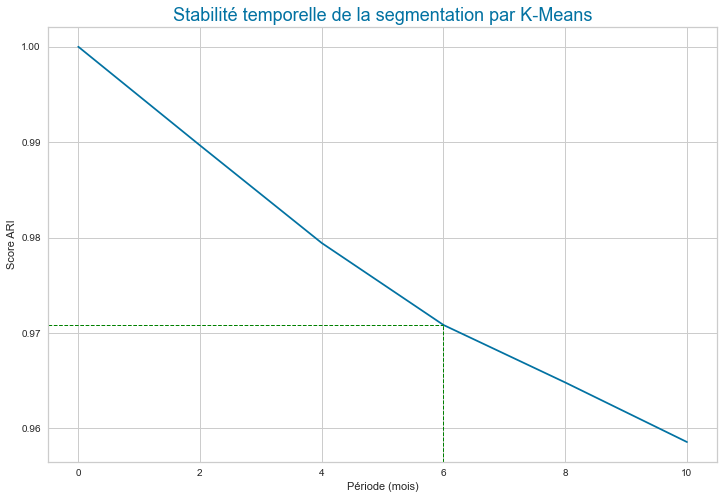

In [64]:
ari_score = pd.DataFrame(ari_score, columns=["periode", "ARI"])

# plot ARI Score
fig = plt.figure(figsize=(12, 8))
sns.lineplot(data=ari_score, x="periode", y="ARI")
plt.axhline(y=ari_score.iloc[3][1], linestyle="--",
            color="green",
            xmax=0.59,
            linewidth=1)
plt.axvline(x=ari_score.iloc[3][0], linestyle="--",
            color="green",
            ymax=((ari_score.iloc[3][1]-ari_score.iloc[-1][1]) /
                  (ari_score.iloc[0][1]-ari_score.iloc[-1][1])+0.02),
            linewidth=1)
plt.xlabel("Période (mois)")
plt.ylabel("Score ARI")
plt.title("Stabilité temporelle de la segmentation par K-Means",
          fontsize=18,
          color="b")
plt.show()

In [65]:
# Afficher le score
ari_score

periode       ARI
0        0  1.000000
1        2  0.989658
2        4  0.979431
3        6  0.970843
4        8  0.964819
5       10  0.958580

Sur ce plot des scores ARI obtenus sur les itérations par période de 2 mois, on remarque une forte inflexion après 6 mois sur les clients initiaux.

Il faudra donc prévoir la maintenance du programme de segmentation tous les 6 mois dans un premier temps puis re-tester cette stabilité temporelle au fil du temps afin de l'affiner. Il sera donc nécessaire de redéfinir les segments clients à chaque maintenance.

# Test avec l'algorithme DBSCAN et Agglomerative Clustering 

In [66]:
from sklearn.cluster import DBSCAN
from time import time
from sklearn.metrics import homogeneity_score, adjusted_rand_score, adjusted_mutual_info_score

## DBSCAN sans PCA

Je reprend le dataset nettoyé data_cleaned pour en créer une autre copie que je vais appelé Y et ensuite supprimer les catégories de produits comme faite au dessus.

In [67]:
Y = data_cleaned.copy()

In [68]:
# Suppression des variables
cat_columns = ['books_cds_media', 'fashion_clothing_accessories', 'flowers_gifts', 'toys_baby',
                  'groceries_food_drink', 'health_beauty', 'home_furniture', 'other','sport','technology']
Y = Y.drop(categories_products, axis=1)
Y.head()

nb_orders  total_spend  \
customer_unique_id                                         
0000366f3b9a7992bf8c76cfdf3221e2          1       141.90   
0000b849f77a49e4a4ce2b2a4ca5be3f          1        27.19   
0000f46a3911fa3c0805444483337064          1        86.22   
0000f6ccb0745a6a4b88665a16c9f078          1        43.62   
0004aac84e0df4da2b147fca70cf8255          1       196.89   

                                  mean_payment_sequential  \
customer_unique_id                                          
0000366f3b9a7992bf8c76cfdf3221e2                      1.0   
0000b849f77a49e4a4ce2b2a4ca5be3f                      1.0   
0000f46a3911fa3c0805444483337064                      1.0   
0000f6ccb0745a6a4b88665a16c9f078                      1.0   
0004aac84e0df4da2b147fca70cf8255                      1.0   

                                  mean_payment_installments  \
customer_unique_id                                            
0000366f3b9a7992bf8c76cfdf3221e2                        8.0   
0000b849f77a49e4a4ce2b2a4ca5be3f                        1.0   
0000f46a3911fa3c0805444483337064                        8.0   
0000f6ccb0745a6a4b88665a16c9f078                        4.0   
0004aac84e0df4da2b147fca70cf8255                        6.0   

                                  mean_review_score  mean_delivery_days  \
customer_unique_id                                                        
0000366f3b9a7992bf8c76cfdf3221e2                5.0                 6.0   
0000b849f77a49e4a4ce2b2a4ca5be3f                4.0                 3.0   
0000f46a3911fa3c0805444483337064                3.0                26.0   
0000f6ccb0745a6a4b88665a16c9f078                4.0                20.0   
0004aac84e0df4da2b147fca70cf8255                5.0                13.0   

                                  favorite_sale_month  total_items  \
customer_unique_id                                                   
0000366f3b9a7992bf8c76cfdf3221e2                    5          1.0   
0000b849f77a49e4a4ce2b2a4ca5be3f                    5          1.0   
0000f46a3911fa3c0805444483337064                    3          1.0   
0000f6ccb0745a6a4b88665a16c9f078                   10          1.0   
0004aac84e0df4da2b147fca70cf8255                   11          1.0   

                                  delay_mean_orders  freight_ratio  \
customer_unique_id                                                   
0000366f3b9a7992bf8c76cfdf3221e2              111.0           0.08   
0000b849f77a49e4a4ce2b2a4ca5be3f              114.0           0.30   
0000f46a3911fa3c0805444483337064              537.0           0.20   
0000f6ccb0745a6a4b88665a16c9f078              321.0           0.40   
0004aac84e0df4da2b147fca70cf8255              288.0           0.09   

                                  harvesine_distance  kmeans_label  
customer_unique_id                                                  
0000366f3b9a7992bf8c76cfdf3221e2          209.713834             1  
0000b849f77a49e4a4ce2b2a4ca5be3f          209.713834             3  
0000f46a3911fa3c0805444483337064          125.363853             5  
0000f6ccb0745a6a4b88665a16c9f078         1574.231129             0  
0004aac84e0df4da2b147fca70cf8255          209.713834             0

In [69]:
scaler = MinMaxScaler()

preprocessor = ColumnTransformer([
    ('scaler', scaler, Y)])

In [70]:
# Standardisation 
scaler = StandardScaler()
Y_scaler = scaler.fit_transform(Y)

# Normaliser les données pour que
# les données suivent approximativement une distribution gaussienne
from sklearn.preprocessing import normalize
Y_normalized = normalize(Y_scaler) 

# Convertir en un DataFrame pandas
Y_normalized = pd.DataFrame(Y_normalized, index=Y.index, columns=Y.columns)

In [71]:
Y_scaler

array([[-0.1598294 , -0.10282433, -0.12038339, ..., -1.02602273,
        -0.60383527, -0.68885009],
       [-0.1598294 , -0.60973825, -0.12038339, ...,  0.73551449,
        -0.60383527,  0.55167936],
       [-0.1598294 , -0.34887931, -0.12038339, ..., -0.06518424,
        -0.82766488,  1.79220881],
       ...,
       [-0.1598294 , -0.23292237, -0.12038339, ..., -0.06518424,
         1.18162243,  1.79220881],
       [-0.1598294 , -0.13910507, -0.12038339, ..., -0.54560348,
         0.61549035,  1.17194408],
       [-0.1598294 , -0.41366318, -0.12038339, ..., -0.06518424,
        -0.87226259,  0.55167936]])

In [72]:
Y_normalized.head()

nb_orders  total_spend  \
customer_unique_id                                         
0000366f3b9a7992bf8c76cfdf3221e2  -0.060061    -0.038639   
0000b849f77a49e4a4ce2b2a4ca5be3f  -0.080591    -0.307449   
0000f46a3911fa3c0805444483337064  -0.041028    -0.089557   
0000f6ccb0745a6a4b88665a16c9f078  -0.039710    -0.133451   
0004aac84e0df4da2b147fca70cf8255  -0.059178     0.051903   

                                  mean_payment_sequential  \
customer_unique_id                                          
0000366f3b9a7992bf8c76cfdf3221e2                -0.045238   
0000b849f77a49e4a4ce2b2a4ca5be3f                -0.060701   
0000f46a3911fa3c0805444483337064                -0.030902   
0000f6ccb0745a6a4b88665a16c9f078                -0.029909   
0004aac84e0df4da2b147fca70cf8255                -0.044573   

                                  mean_payment_installments  \
customer_unique_id                                            
0000366f3b9a7992bf8c76cfdf3221e2                   0.696061   
0000b849f77a49e4a4ce2b2a4ca5be3f                  -0.364757   
0000f46a3911fa3c0805444483337064                   0.475486   
0000f6ccb0745a6a4b88665a16c9f078                   0.094532   
0004aac84e0df4da2b147fca70cf8255                   0.413355   

                                  mean_review_score  mean_delivery_days  \
customer_unique_id                                                        
0000366f3b9a7992bf8c76cfdf3221e2           0.247287           -0.256722   
0000b849f77a49e4a4ce2b2a4ca5be3f          -0.062643           -0.502867   
0000f46a3911fa3c0805444483337064          -0.232705            0.362195   
0000f6ccb0745a6a4b88665a16c9f078          -0.030866            0.194471   
0004aac84e0df4da2b147fca70cf8255           0.243653            0.018431   

                                  favorite_sale_month  total_items  \
customer_unique_id                                                   
0000366f3b9a7992bf8c76cfdf3221e2            -0.120586    -0.109171   
0000b849f77a49e4a4ce2b2a4ca5be3f            -0.161805    -0.146489   
0000f46a3911fa3c0805444483337064            -0.241439    -0.074576   
0000f6ccb0745a6a4b88665a16c9f078             0.305163    -0.072180   
0004aac84e0df4da2b147fca70cf8255             0.569488    -0.107567   

                                  delay_mean_orders  freight_ratio  \
customer_unique_id                                                   
0000366f3b9a7992bf8c76cfdf3221e2          -0.296121      -0.385558   
0000b849f77a49e4a4ce2b2a4ca5be3f          -0.387532       0.370869   
0000f46a3911fa3c0805444483337064           0.506944      -0.016733   
0000f6ccb0745a6a4b88665a16c9f078           0.142603       0.381675   
0004aac84e0df4da2b147fca70cf8255           0.133270      -0.350246   

                                  harvesine_distance  kmeans_label  
customer_unique_id                                                  
0000366f3b9a7992bf8c76cfdf3221e2           -0.226909     -0.258855  
0000b849f77a49e4a4ce2b2a4ca5be3f           -0.304472      0.278174  
0000f46a3911fa3c0805444483337064           -0.212460      0.460057  
0000f6ccb0745a6a4b88665a16c9f078            0.749585     -0.325252  
0004aac84e0df4da2b147fca70cf8255           -0.223574     -0.484709

In [73]:
# Numpy array of all the cluster labels assigned to each data point
model_db = DBSCAN(eps = 0.405, min_samples = 5).fit(Y_normalized)
labels = model_db.labels_

In [74]:
np.unique(labels)

array([-1,  0,  1,  2,  3], dtype=int64)

In [75]:
#  Construire le modèle de clustering
from sklearn import metrics
labels_true = Y.index

# Tableau Numpy de toutes les étiquettes de cluster attribuées 
#à chaque point de données
model_db = DBSCAN(eps = 0.405, min_samples = 5).fit(Y_normalized)
core_samples_mask = np.zeros_like(model_db.labels_, dtype=bool)
core_samples_mask[model_db.core_sample_indices_] = True
labels = model_db.labels_

# Nombre de clusters dans les étiquettes,
#en ignorant le bruit s'il est présent
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.4f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.4f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.4f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.4f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.4f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.4f"
      % metrics.silhouette_score(Y, labels))

Estimated number of clusters: 4
Estimated number of noise points: 591
Homogeneity: 0.0036
Completeness: 1.0000
V-measure: 0.0071
Adjusted Rand Index: 0.0000
Adjusted Mutual Information: 0.0000
Silhouette Coefficient: -0.1816


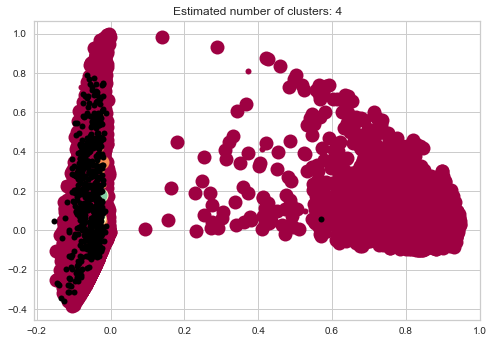

In [76]:
# Visualisation

# Le noir a été supprimé et est utilisé pour le bruit à la place.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Noir utilisé pour le bruit
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = Y_normalized[class_member_mask & core_samples_mask]
    plt.plot(xy.iloc[:, 0], xy.iloc[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = Y_normalized[class_member_mask & ~core_samples_mask]
    plt.plot(xy.iloc[:, 0], xy.iloc[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

## DBSCAN avec PCA

In [77]:
# Réduire la dimensionnalité des Données

model = PCA(n_components = 2)
Y_model = model.fit_transform(Y_normalized)
Y_model = pd.DataFrame(Y_model)
Y_model.columns = ['P1', 'P2']

In [78]:
# Tableau Numpy de toutes les étiquettes de cluster attribuées à chaque point de données
model_db = DBSCAN(eps = 0.025, min_samples = 5).fit(Y_model)
labels = model_db.labels_

In [79]:
np.unique(labels)

array([-1,  0,  1,  2,  3,  4], dtype=int64)

In [80]:
#  Construire le modèle de clustering
labels_true = Y.index

# Tableau Numpy de toutes les étiquettes de cluster attribuées 
#à chaque point de données
model_db = DBSCAN(eps = 0.025, min_samples = 5).fit(Y_model)
core_samples_mask = np.zeros_like(model_db.labels_, dtype=bool)
core_samples_mask[model_db.core_sample_indices_] = True
labels = model_db.labels_

# Nombre de clusters dans les étiquettes,
#en ignorant le bruit s'il est présent
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.4f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.4f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.4f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.4f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.4f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.4f"
      % metrics.silhouette_score(Y, labels))

Estimated number of clusters: 5
Estimated number of noise points: 89
Homogeneity: 0.0010
Completeness: 1.0000
V-measure: 0.0020
Adjusted Rand Index: 0.0000
Adjusted Mutual Information: -0.0000
Silhouette Coefficient: 0.0170


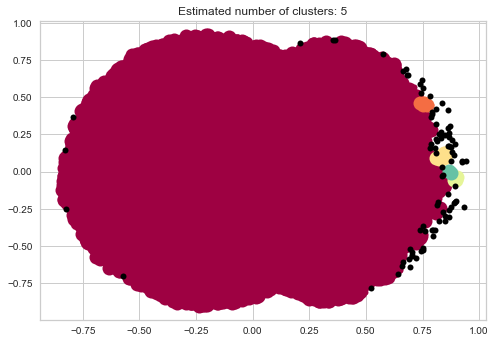

In [81]:
# Visualisation

# Le noir a été supprimé et est utilisé pour le bruit à la place.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Noir utilisé pour le bruit
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = Y_model[class_member_mask & core_samples_mask]
    plt.plot(xy.iloc[:, 0], xy.iloc[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = Y_model[class_member_mask & ~core_samples_mask]
    plt.plot(xy.iloc[:, 0], xy.iloc[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()